In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
lead_data = pd.read_csv("Leads.csv")
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


DATA Inspection


In [5]:
#Checking the shape of the data
lead_data.shape

(9240, 37)

In [6]:
# checking non null count and datatype of the variables
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

All datatypes and variables seems to be in correct format

In [7]:
# Describe data 
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [9]:
# From above description we can see there are missing vaues in the dataset

## Data Cleaning

1)Handling the 'Select' level that is present in many of the categorical variables.
We observe that there are 'Select' values in many columns.It may be because the customer did not select any option from the list, hence it shows 'Select'.'Select' values are as good as NULL. So we can convert these values to null values.

In [8]:
# Converting 'Select' values to NaN.
lead_data = lead_data.replace('Select', np.nan)

In [9]:
# checking the columns for null values
lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
# Finding the null percentages across columns
round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

In [11]:
# dropping the columns with missing values greater than or equal to 40% .
lead_data=lead_data.drop(columns=['How did you hear about X Education','Lead Quality','Lead Profile',
                                  'Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score',
                                 'Asymmetrique Profile Score'])

In [12]:
# Finding the null percentages across columns after removing the above columns
round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

1) Column: 'Specialization'
This column has 37% missing values

It may be possible that the lead may leave this column blank if he may be a student or not having any specialization or his specialization is not there in the options given. So we can create a another category 'Others' for this.

In [13]:
lead_data['Specialization'] = lead_data['Specialization'].replace(np.nan, 'Others')

2) Tags column  : 'Tags' column has 36% missing values

Since most values are 'Will revert after reading the email' , we can impute missing values in this column with this value.

In [14]:
lead_data['Tags']=lead_data['Tags'].replace(np.nan,'Will revert after reading the email')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'Closed by Horizzon'),
  Text(12, 0, 'number not provided'),
  Text(13, 0, 'opp hangup'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0, 'Interested in Next batc

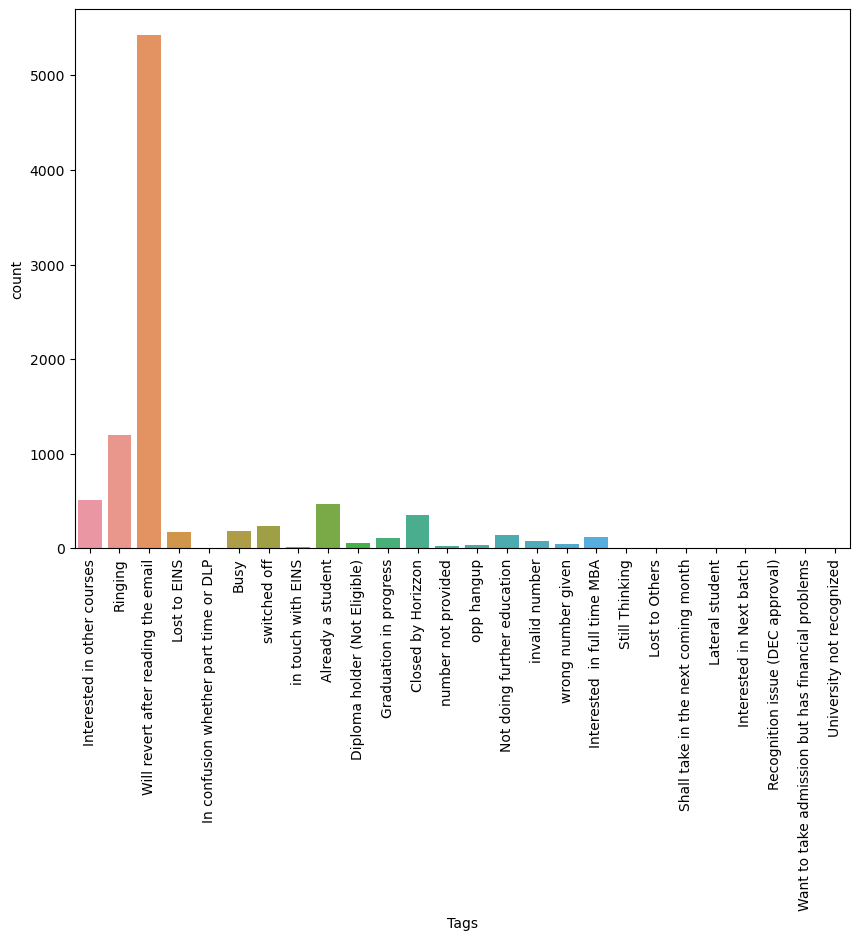

In [15]:
# Visualizing Tags column
plt.figure(figsize=(10,7))
sns.countplot(x=lead_data['Tags'])
plt.xticks(rotation=90)

3) Column: 'What matters most to you in choosing a course'
this column has 29% missing values

In [16]:
# Imputing the missing data in the tags column with 'Will revert after reading the email'
lead_data['Tags']=lead_data['Tags'].replace(np.nan,'Will revert after reading the email')

TypeError: Horizontal orientation requires numeric `x` variable.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


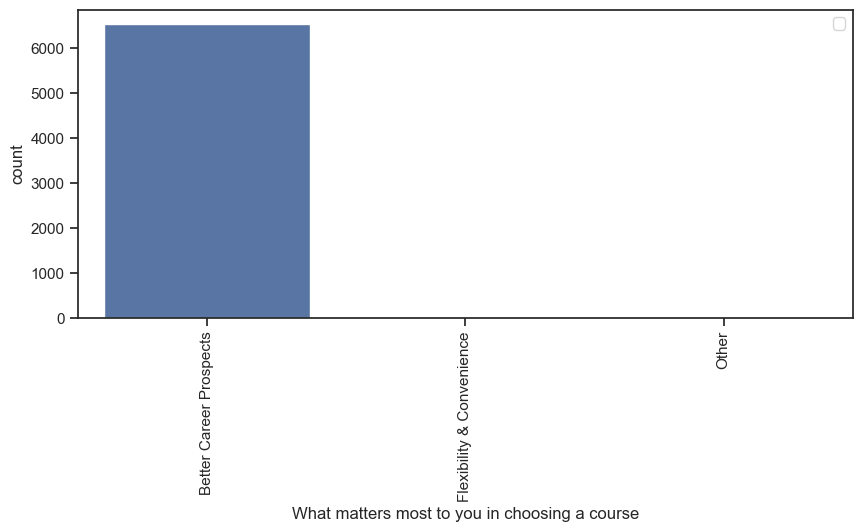

In [29]:
sns.set(style="ticks")
sc=sns.countplot(x=lead_data['What matters most to you in choosing a course'])
sc.figure.set_size_inches(10,4)
sc.legend()
plt.xticks(rotation=90)
plt.show()

In [30]:
round(lead_data['What matters most to you in choosing a course'].value_counts(normalize=True),2)*100

Better Career Prospects      100.0
Flexibility & Convenience      0.0
Other                          0.0
Name: What matters most to you in choosing a course, dtype: float64

We can see that this is highly skewed column so we can remove this column.

In [31]:
# Dropping this column 
lead_data=lead_data.drop('What matters most to you in choosing a course',axis=1)

4) Column: 'What is your current occupation'
this column has 29% missing values

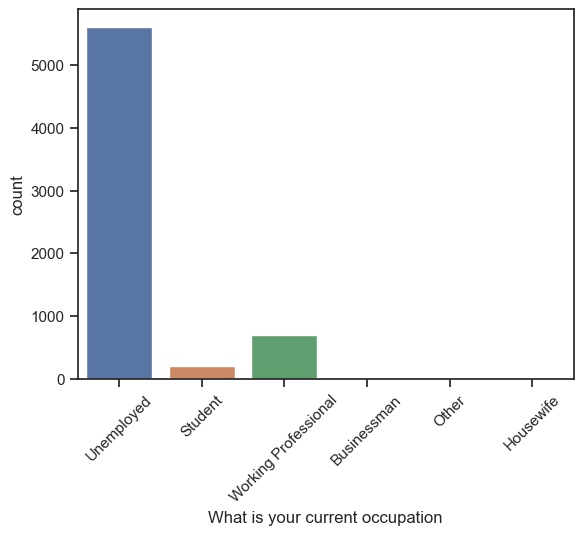

In [34]:
sns.countplot(x=lead_data['What is your current occupation'])
plt.xticks(rotation=45)
plt.show()

In [35]:
round(lead_data['What is your current occupation'].value_counts(normalize=True),2)*100

Unemployed              85.0
Working Professional    11.0
Student                  3.0
Other                    0.0
Housewife                0.0
Businessman              0.0
Name: What is your current occupation, dtype: float64

Since the most values are 'Unemployed' , we can impute missing values in this column with this value

In [36]:
# Imputing the missing data in the 'What is your current occupation' column with 'Unemployed'
lead_data['What is your current occupation']=lead_data['What is your current occupation'].replace(np.nan,'Unemployed')

5) Column: 'Country'
This column has 27% missing values

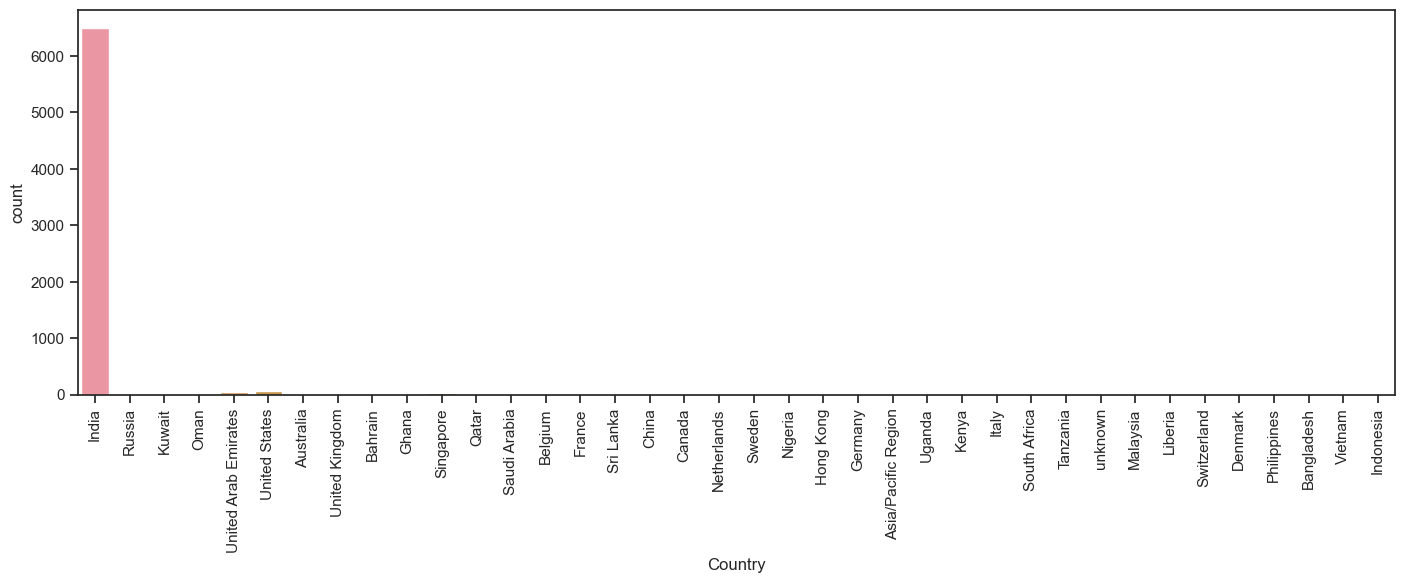

In [38]:
plt.figure(figsize=(17,5))
sns.countplot(x=lead_data['Country'])
plt.xticks(rotation=90)
plt.show()

We can see that this is highly skewed column but it is an important information w.r.t. to the lead. Since most values are 'India' , we can impute missing values in this column with this value.

In [35]:
# Imputing the missing data in the 'Country' column with 'India'
lead_data['Country']=lead_data['Country'].replace(np.nan,'India')

6) Column: 'City'
This column has 40% missing values

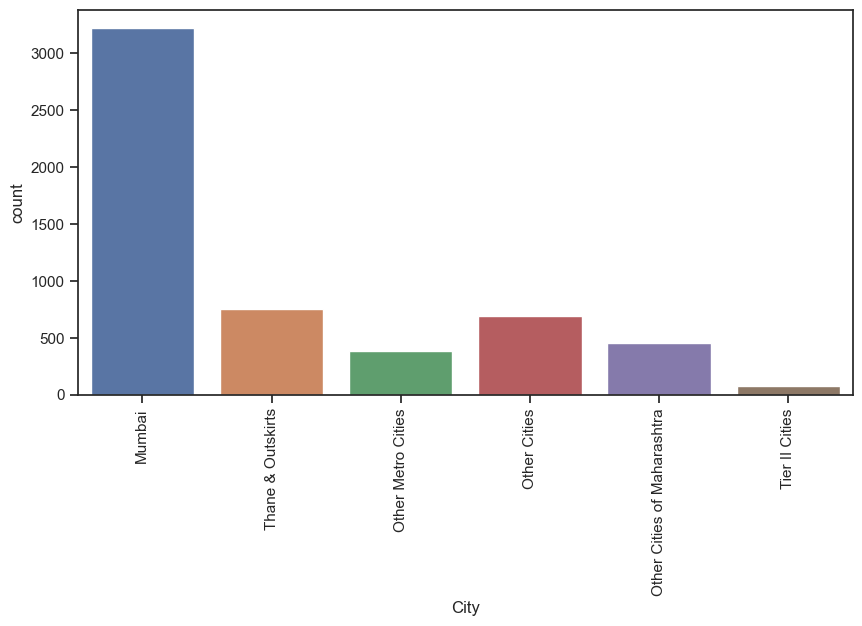

In [40]:
plt.figure(figsize=(10,5))
sns.countplot(x=lead_data['City'])
plt.xticks(rotation=90)
plt.show()

In [41]:
# Finding the percentage of the different categories of this column:
round(lead_data['City'].value_counts(normalize=True),2)*100

Mumbai                         58.0
Thane & Outskirts              13.0
Other Cities                   12.0
Other Cities of Maharashtra     8.0
Other Metro Cities              7.0
Tier II Cities                  1.0
Name: City, dtype: float64

Since most values are 'Mumbai' , we can impute missing values in this column with this value.

In [42]:
# Imputing the missing data in the 'City' column with 'Mumbai'
lead_data['City']=lead_data['City'].replace(np.nan,'Mumbai')

In [43]:
# Finding the null percentages across columns after removing the above columns
round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Prospect ID                                  0.0
Lead Number                                  0.0
Lead Origin                                  0.0
Lead Source                                  0.0
Do Not Email                                 0.0
Do Not Call                                  0.0
Converted                                    0.0
TotalVisits                                  1.0
Total Time Spent on Website                  0.0
Page Views Per Visit                         1.0
Last Activity                                1.0
Country                                     27.0
Specialization                               0.0
What is your current occupation              0.0
Search                                       0.0
Magazine                                     0.0
Newspaper Article                            0.0
X Education Forums                           0.0
Newspaper                                    0.0
Digital Advertisement                        0.0
Through Recommendati

Rest missing values are under 2% so we can drop these rows.

In [44]:
# Dropping the rows with null values
lead_data.dropna(inplace = True)

In [46]:
# Finding the null percentages across columns after removing the above columns
round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

Now we don't have any missing value in the dataset.

## We can find the percentage of rows retained

In [47]:
# Percentage of rows retained 
(len(lead_data.index)/9240)*100

73.35497835497836

### We have retained 73% of the rows after cleaning the data .¶

# Exploratory Data Anaysis


### Checking for duplicates

In [48]:
lead_data[lead_data.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


We see there are no duplicate records in our lead dataset.

## Univariate Analysis and Bivariate Analysis

### 1) Converted

### Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0)

In [49]:
Converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
Converted

36.64797875479493

The lead conversion rate is 38%.

### 2) Lead Origin

(array([0, 1, 2]),
 [Text(0, 0, 'API'),
  Text(1, 0, 'Landing Page Submission'),
  Text(2, 0, 'Lead Add Form')])

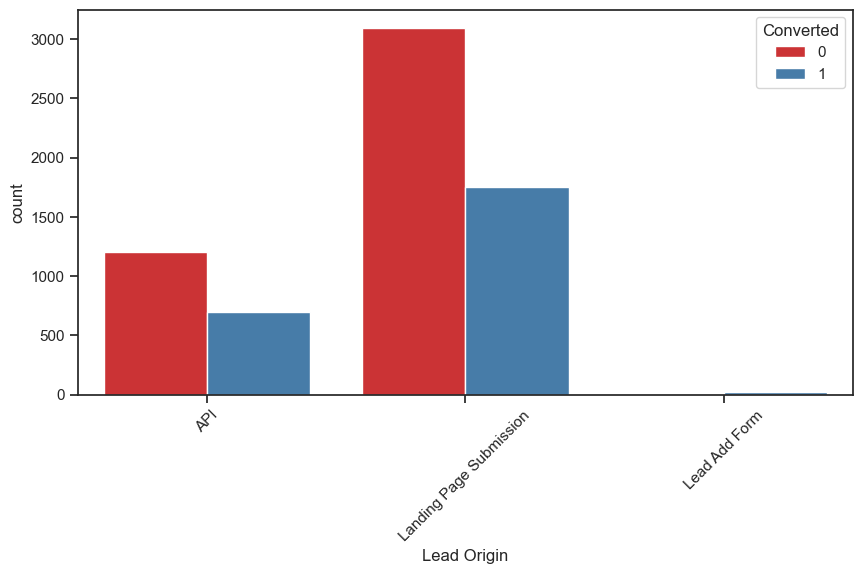

In [50]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 45)

### Inference :
API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable.
Lead Add Form has more than 90% conversion rate but count of lead are not very high.
Lead Import are very less in count.
##### To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

### 3) Lead Source

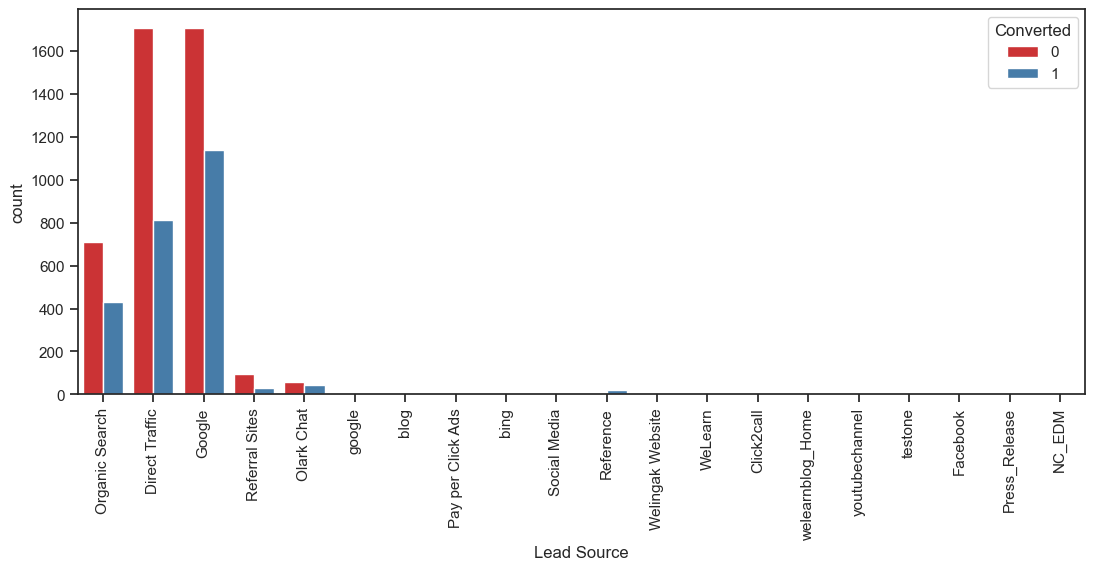

In [51]:
plt.figure(figsize=(13,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_data, palette='Set1')
plt.xticks(rotation = 90)
plt.show()

In [52]:
# Need to replace 'google' with 'Google'
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['google'], 'Google')

In [53]:
# Creating a new category 'Others' for some of the Lead Sources which do not have much values.
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Organic Search'),
  Text(1, 0, 'Direct Traffic'),
  Text(2, 0, 'Google'),
  Text(3, 0, 'Referral Sites'),
  Text(4, 0, 'Olark Chat'),
  Text(5, 0, 'Others'),
  Text(6, 0, 'Reference'),
  Text(7, 0, 'Welingak Website'),
  Text(8, 0, 'Facebook')])

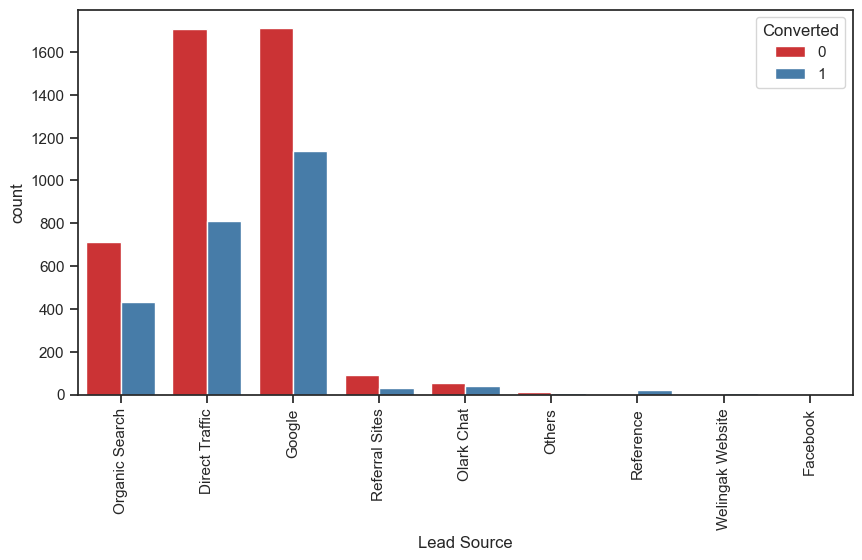

In [54]:
# Visualizing again
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

### Inference
1. Google and Direct traffic generates maximum number of leads.

2. Conversion Rate of reference leads and leads through welingak website is high.
#### To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

### 4) Do not Email

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

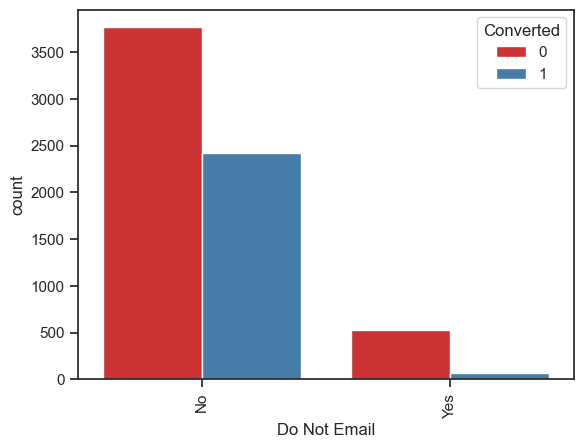

In [55]:
sns.countplot(x = "Do Not Email", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

### Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

### 5) Do not call


(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

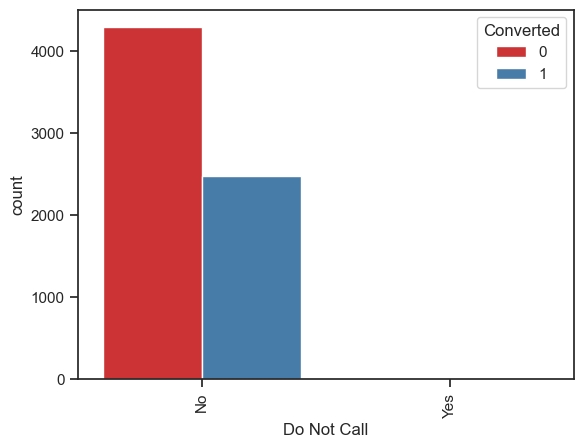

In [56]:
sns.countplot(x = "Do Not Call", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

### Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

### 6) TotalVisits

In [57]:
lead_data['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    6778.000000
mean        4.554293
std         5.138434
min         0.000000
5%          1.000000
25%         2.000000
50%         4.000000
75%         5.000000
90%         8.000000
95%        11.000000
99%        18.230000
max       251.000000
Name: TotalVisits, dtype: float64

<Axes: xlabel='TotalVisits'>

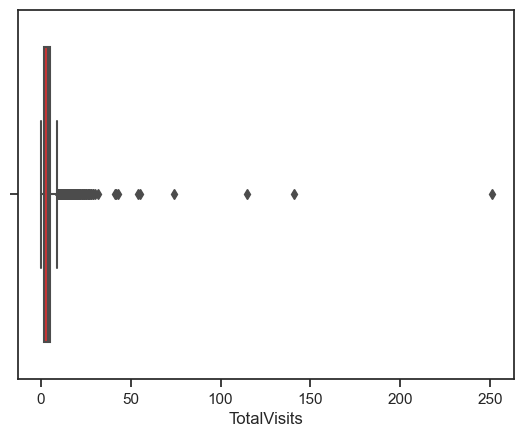

In [59]:
sns.boxplot(x=lead_data['TotalVisits'],orient='vert',palette='Set1')

In [60]:
percentiles = lead_data['TotalVisits'].quantile([0.05,0.95]).values
lead_data['TotalVisits'][lead_data['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead_data['TotalVisits'][lead_data['TotalVisits'] >= percentiles[1]] = percentiles[1]

<Axes: xlabel='TotalVisits'>

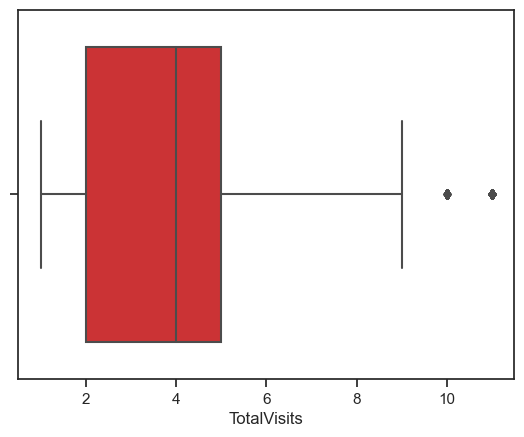

In [61]:
# Visualizing again
sns.boxplot(x=lead_data['TotalVisits'],orient='vert',palette='Set1')

<Axes: xlabel='Converted', ylabel='TotalVisits'>

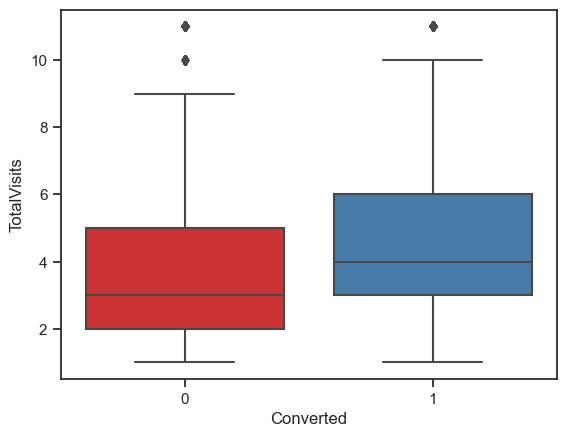

In [62]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_data,palette='Set1')

### Inference

Median for converted and not converted leads are the same.

##### Nothing can be concluded on the basis of Total Visits.

### 7) Total Time Spent on Website

In [63]:
lead_data['Total Time Spent on Website'].describe()

count    6778.000000
mean      631.990558
std       542.103039
min         0.000000
25%       171.000000
50%       397.000000
75%      1105.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

<Axes: xlabel='Total Time Spent on Website'>

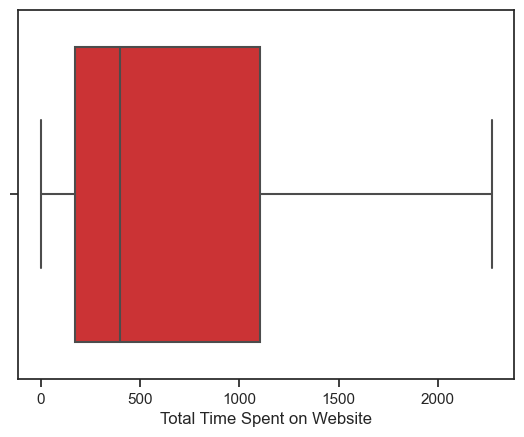

In [65]:
sns.boxplot(x=lead_data['Total Time Spent on Website'],orient='vert',palette='Set1')

<Axes: xlabel='Converted', ylabel='Total Time Spent on Website'>

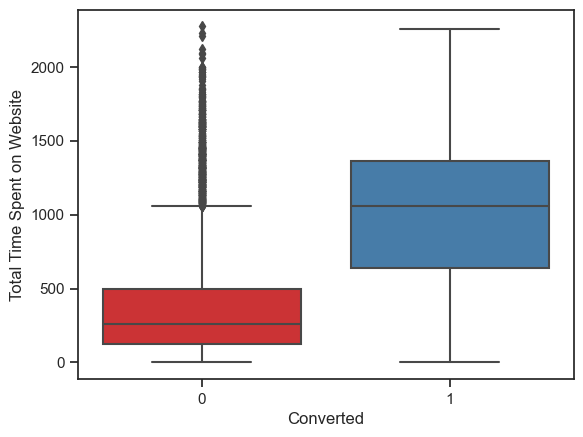

In [66]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_data,palette='Set1')

### Inference

Leads spending more time on the weblise are more likely to be converted.

#### Website should be made more engaging to make leads spend more time.

### 8) Page Views Per Visit

In [67]:
lead_data['Page Views Per Visit'].describe()

count    6778.000000
mean        3.126363
std         1.959030
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

<Axes: ylabel='Page Views Per Visit'>

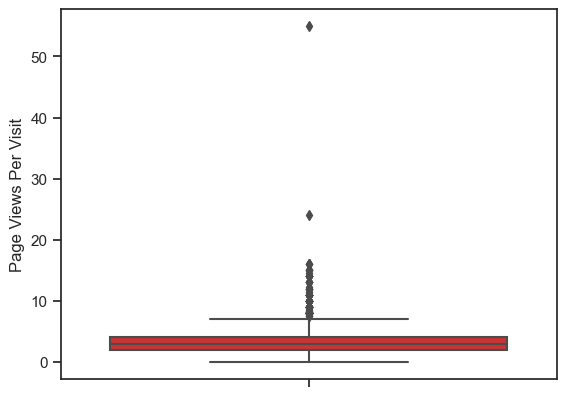

In [70]:
sns.boxplot(y=lead_data['Page Views Per Visit'],orient='vert',palette='Set1')

###### As we can see there are a number of outliers in the data. We will cap the outliers to 95% value for analysis.

In [71]:
percentiles = lead_data['Page Views Per Visit'].quantile([0.05,0.95]).values
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

<Axes: xlabel='Page Views Per Visit'>

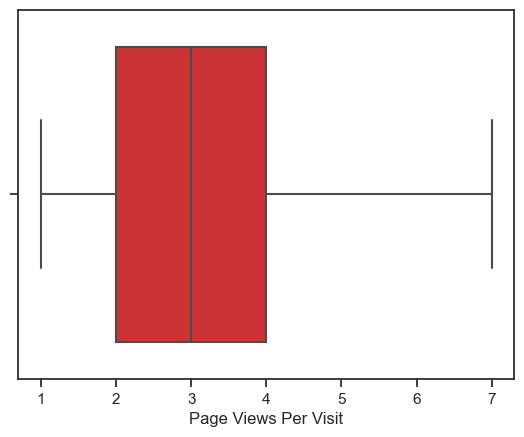

In [72]:
# Visualizing again
sns.boxplot(x=lead_data['Page Views Per Visit'],palette='Set1',orient='vert')

<Axes: xlabel='Converted', ylabel='Page Views Per Visit'>

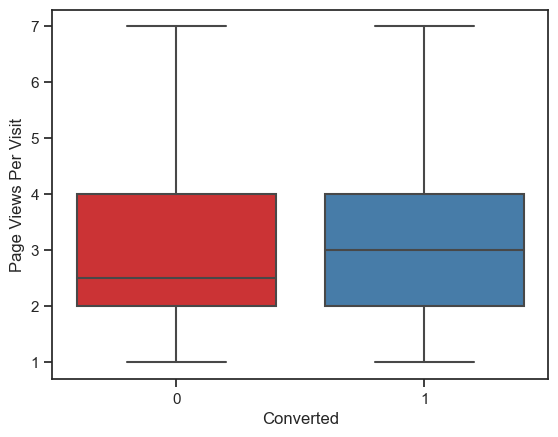

In [73]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data =lead_data,palette='Set1')

#### Inference

Median for converted and unconverted leads is the same.

##### Nothing can be said specifically for lead conversion from Page Views Per Visit

### 9) Last Activity

In [74]:
lead_data['Last Activity'].describe()

count             6778
unique              16
top       Email Opened
freq              2645
Name: Last Activity, dtype: object

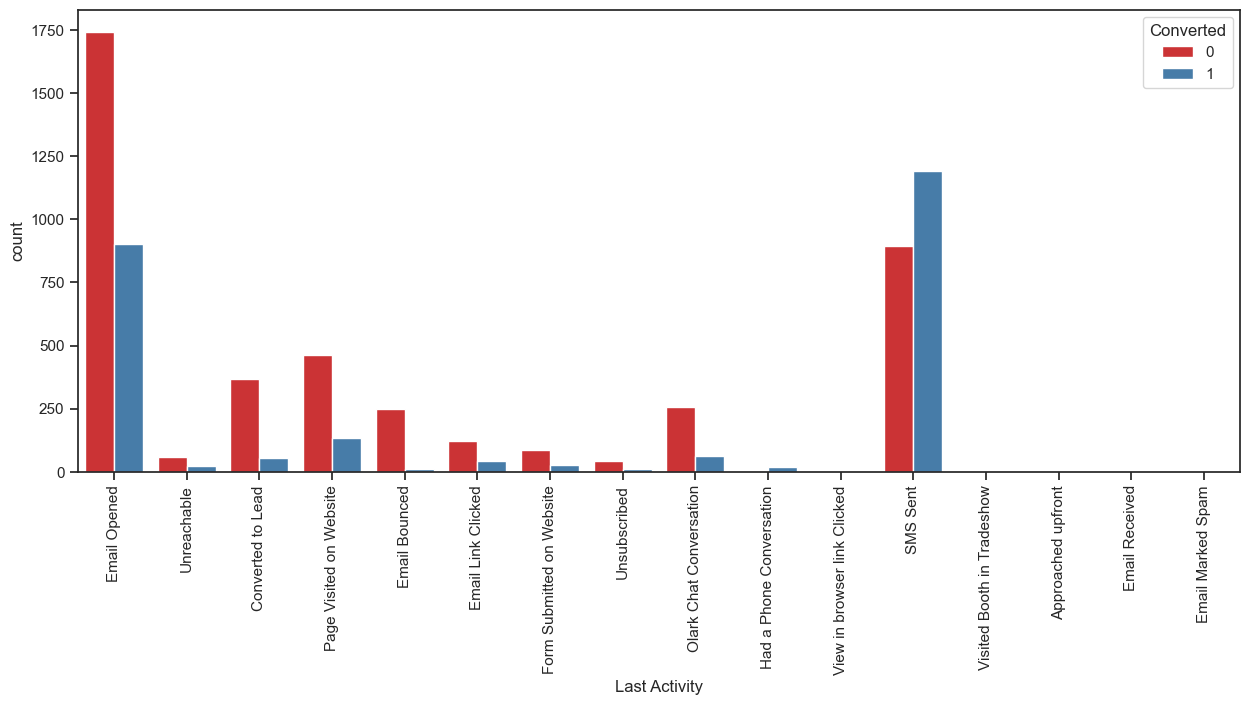

In [76]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

In [77]:
# We can club the last activities to "Other_Activity" which are having less data.
lead_data['Last Activity'] = lead_data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Email Opened'),
  Text(1, 0, 'Unreachable'),
  Text(2, 0, 'Converted to Lead'),
  Text(3, 0, 'Page Visited on Website'),
  Text(4, 0, 'Email Bounced'),
  Text(5, 0, 'Email Link Clicked'),
  Text(6, 0, 'Form Submitted on Website'),
  Text(7, 0, 'Unsubscribed'),
  Text(8, 0, 'Olark Chat Conversation'),
  Text(9, 0, 'Other_Activity'),
  Text(10, 0, 'SMS Sent')])

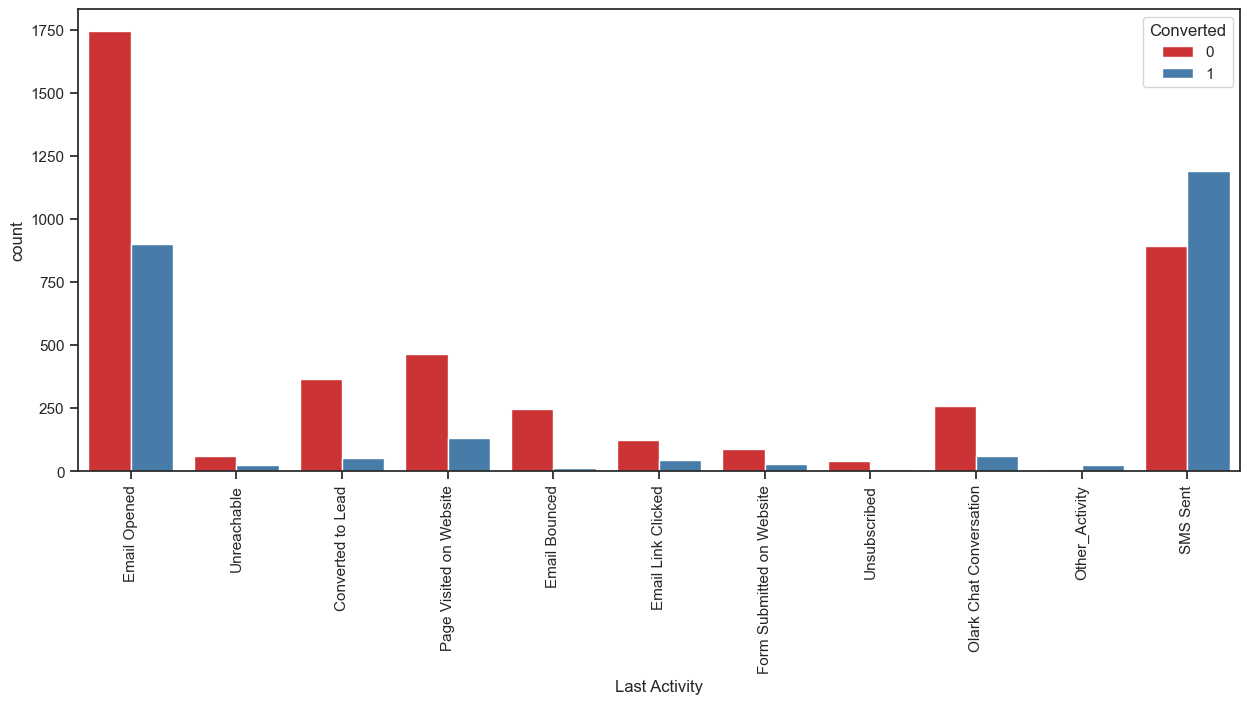

In [78]:
# Visualizing again
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

#### Inference

Most of the lead have their Email opened as their last activity.

##### Conversion rate for leads with last activity as SMS Sent is almost 60%.

### 10) Country

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'Russia'),
  Text(2, 0, 'Kuwait'),
  Text(3, 0, 'Oman'),
  Text(4, 0, 'United Arab Emirates'),
  Text(5, 0, 'United States'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'United Kingdom'),
  Text(8, 0, 'Bahrain'),
  Text(9, 0, 'Ghana'),
  Text(10, 0, 'Singapore'),
  Text(11, 0, 'Qatar'),
  Text(12, 0, 'Saudi Arabia'),
  Text(13, 0, 'Belgium'),
  Text(14, 0, 'France'),
  Text(15, 0, 'Sri Lanka'),
  Text(16, 0, 'China'),
  Text(17, 0, 'Canada'),
  Text(18, 0, 'Netherlands'),
  Text(19, 0, 'Sweden'),
  Text(20, 0, 'Nigeria'),
  Text(21, 0, 'Hong Kong'),
  Text(22, 0, 'Germany'),
  Text(23, 0, 'Asia/Pacific Region'),
  Text(24, 0, 'Uganda'),
  Text(25, 0, 'Kenya'),
  Text(26, 0, 'Italy'),
  Text(27, 0, 'South Africa'),
  Text(28, 0, 'Tanzania'),
  Text(29, 0, 'unknown'),
  Text(30, 0

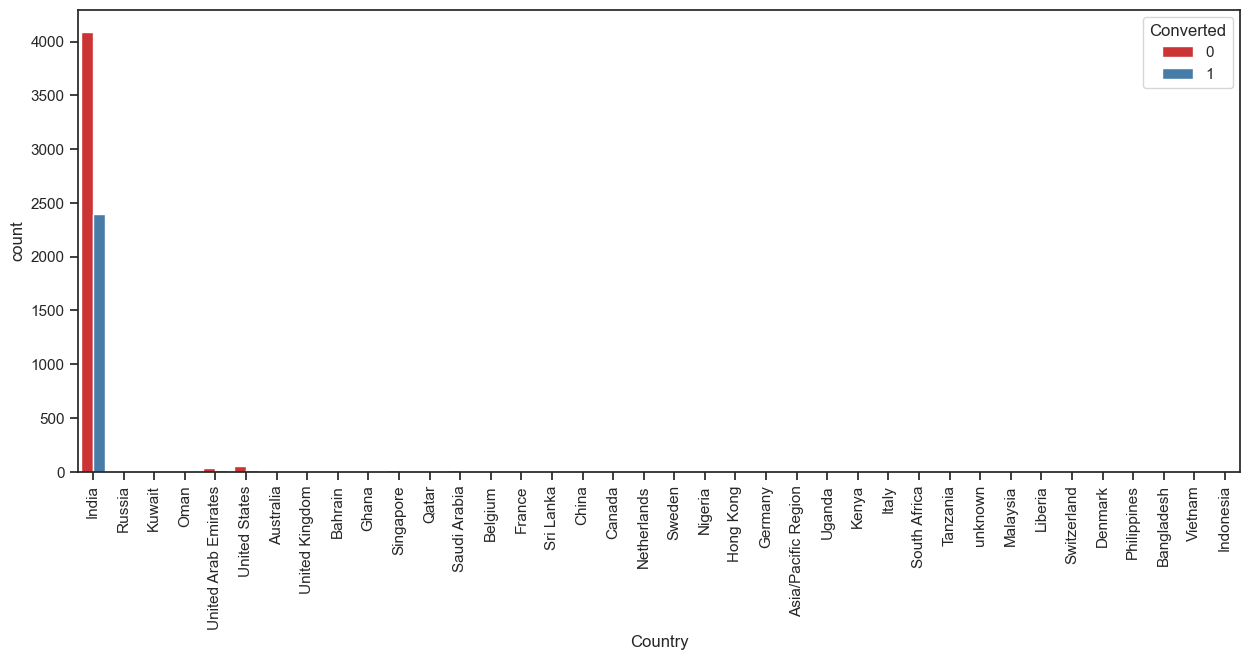

In [79]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Country", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

#### Inference

#### Most values are 'India' no such inference can be drawn

### 11) Specialization

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Others'),
  Text(1, 0, 'Business Administration'),
  Text(2, 0, 'Media and Advertising'),
  Text(3, 0, 'Supply Chain Management'),
  Text(4, 0, 'IT Projects Management'),
  Text(5, 0, 'Finance Management'),
  Text(6, 0, 'Travel and Tourism'),
  Text(7, 0, 'Human Resource Management'),
  Text(8, 0, 'Marketing Management'),
  Text(9, 0, 'Banking, Investment And Insurance'),
  Text(10, 0, 'International Business'),
  Text(11, 0, 'E-COMMERCE'),
  Text(12, 0, 'Operations Management'),
  Text(13, 0, 'Retail Management'),
  Text(14, 0, 'Services Excellence'),
  Text(15, 0, 'Hospitality Management'),
  Text(16, 0, 'Rural and Agribusiness'),
  Text(17, 0, 'Healthcare Management'),
  Text(18, 0, 'E-Business')])

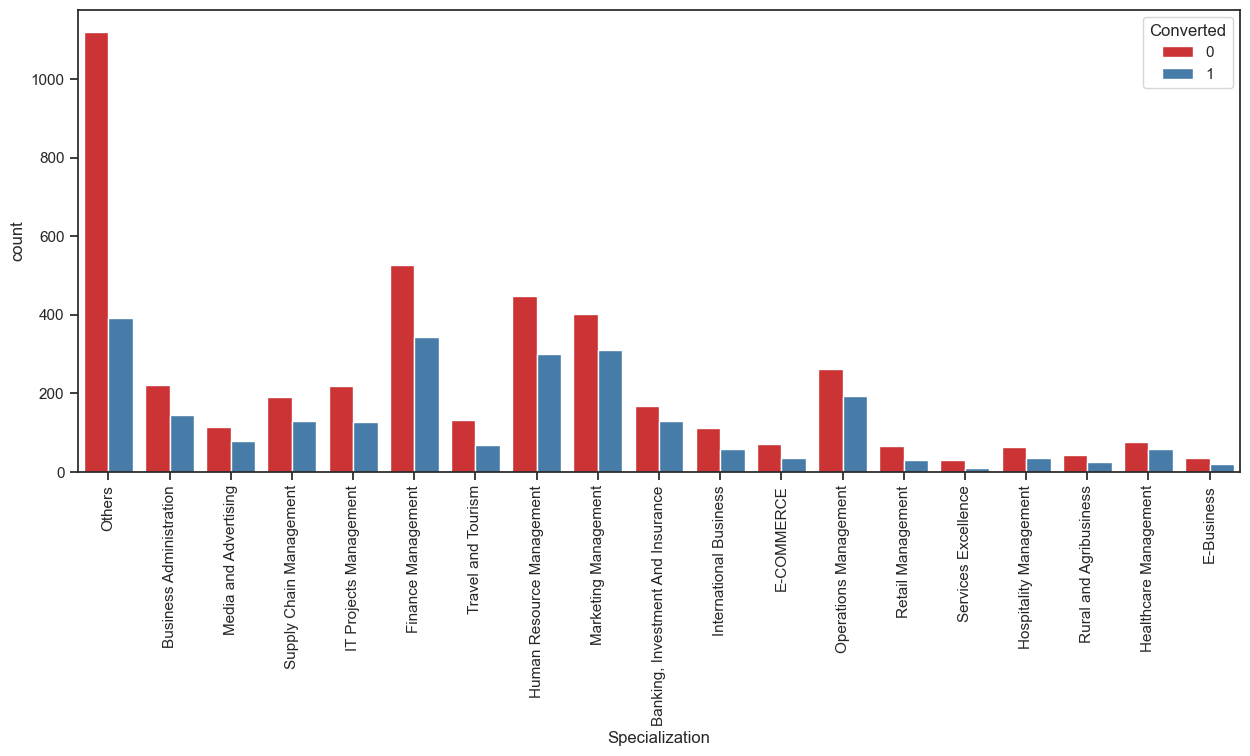

In [80]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Specialization", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

#### Inference

#### Focus should be more on the Specialization with high conversion rate.


### 12) What is your current occupation

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

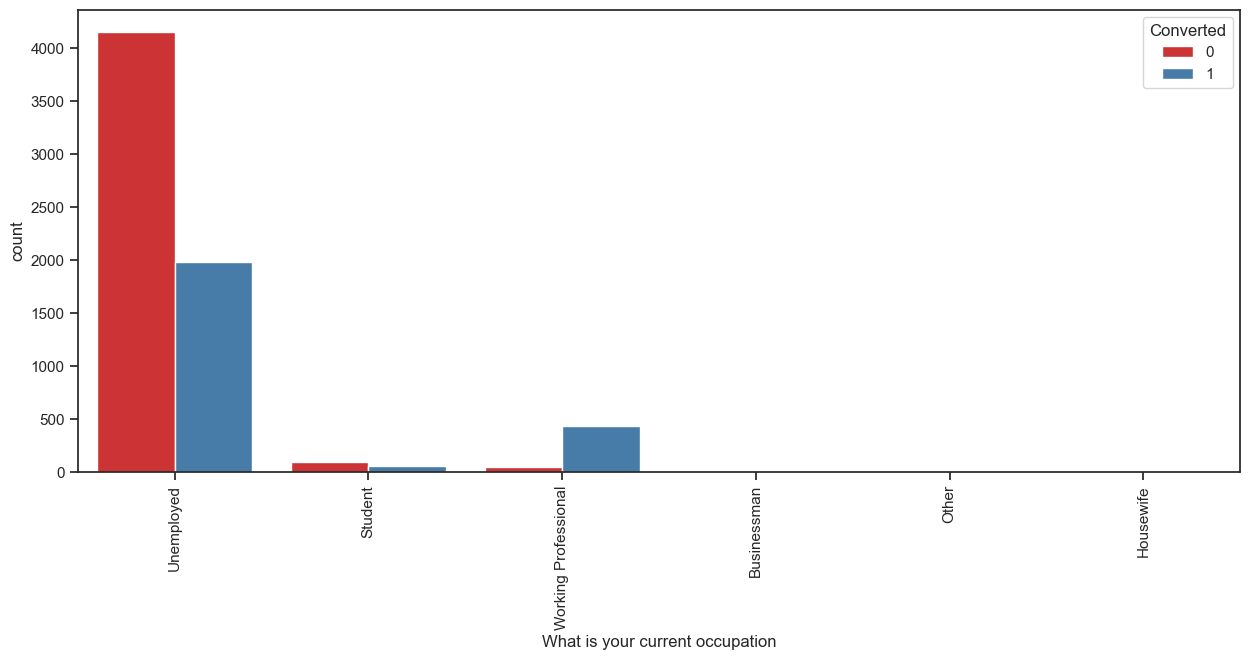

In [81]:
plt.figure(figsize=(15,6))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

#### Inference

##### Working Professionals going for the course have high chances of joining it.
##### Unemployed leads are the most in numbers but has around 30-35% conversion rate.

### 13) Search

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

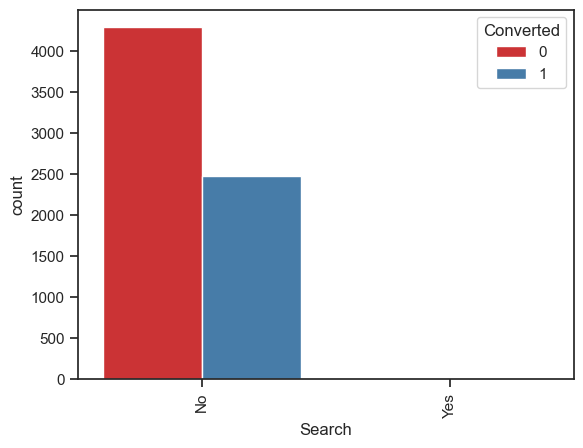

In [82]:
sns.countplot(x = "Search", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

#### Inference

##### Most entries are 'No'. No Inference can be drawn with this parameter.

### 14) Magazine

(array([0]), [Text(0, 0, 'No')])

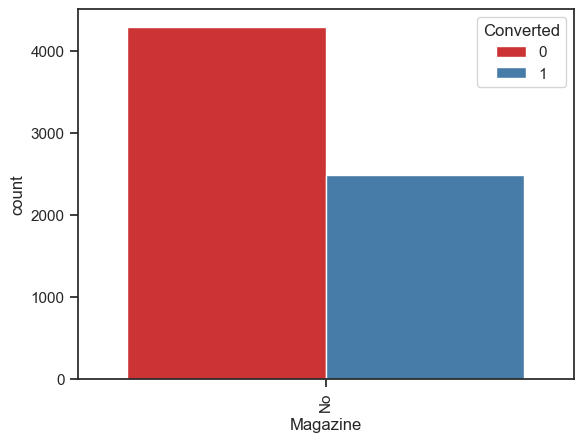

In [83]:
sns.countplot(x = "Magazine", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

#### Inference

##### Most entries are 'No'. No Inference can be drawn with this parameter.

### 15) Newspaper Article

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

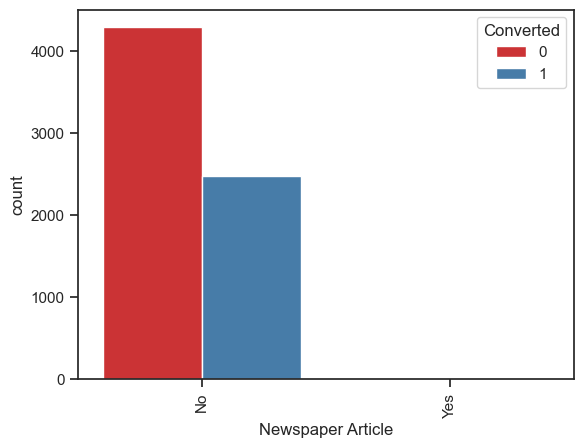

In [84]:
sns.countplot(x = "Newspaper Article", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

#### Inference

##### Most entries are 'No'. No Inference can be drawn with this parameter.

### 16) X Education Forums

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

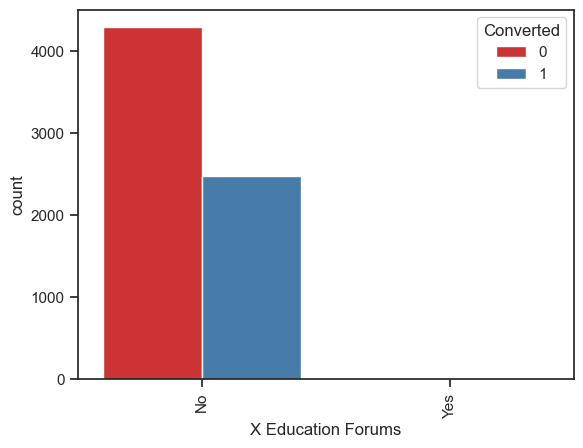

In [85]:
sns.countplot(x = "X Education Forums", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

#### Inference¶

##### Most entries are 'No'. No Inference can be drawn with this parameter.

### 17) Newspaper

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

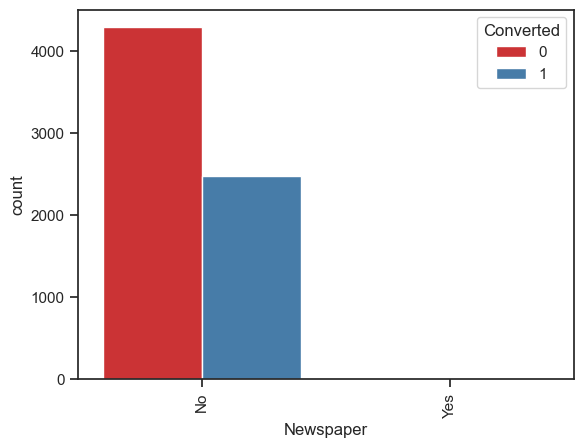

In [86]:
sns.countplot(x = "Newspaper", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

#### Inference

##### Most entries are 'No'. No Inference can be drawn with this parameter.

### 18) Digital Advertisement

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

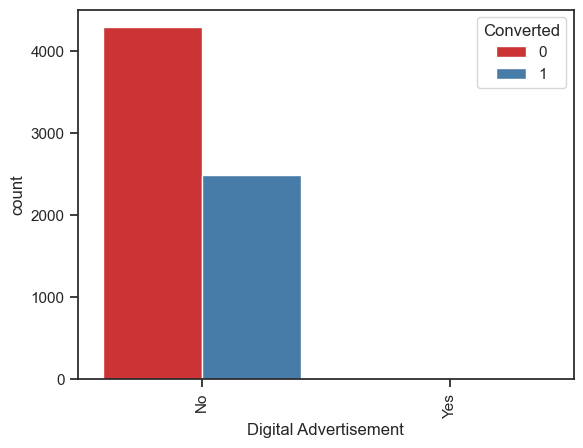

In [87]:
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

#### Inference

##### Most entries are 'No'. No Inference can be drawn with this parameter.

### 19) Through Recommendations

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

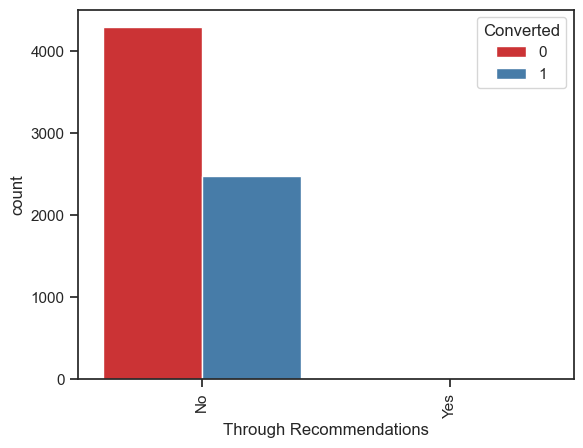

In [88]:
sns.countplot(x = "Through Recommendations", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

#### Inference

##### Most entries are 'No'. No Inference can be drawn with this parameter.

### 20) Receive More Updates About Our Courses

(array([0]), [Text(0, 0, 'No')])

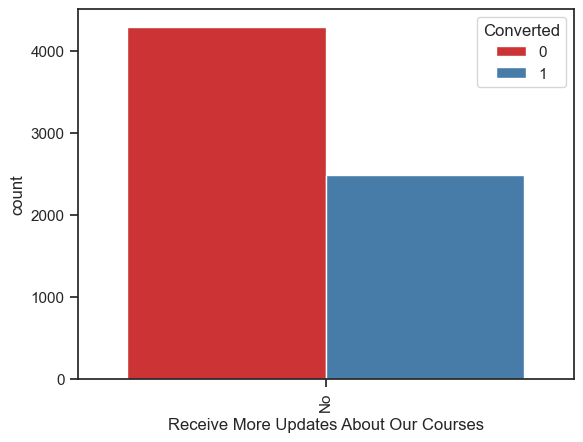

In [89]:
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

#### Inference

##### Most entries are 'No'. No Inference can be drawn with this parameter.

### 21) Tags

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Ringing'),
  Text(1, 0, 'Will revert after reading the email'),
  Text(2, 0, 'Lost to EINS'),
  Text(3, 0, 'Interested in other courses'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'number not provided'),
  Text(12, 0, 'Not doing further education'),
  Text(13, 0, 'invalid number'),
  Text(14, 0, 'wrong number given'),
  Text(15, 0, 'Interested  in full time MBA'),
  Text(16, 0, 'Closed by Horizzon'),
  Text(17, 0, 'opp hangup'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Recognition issue (DEC approval)'),
  Text(22, 0, 'Want t

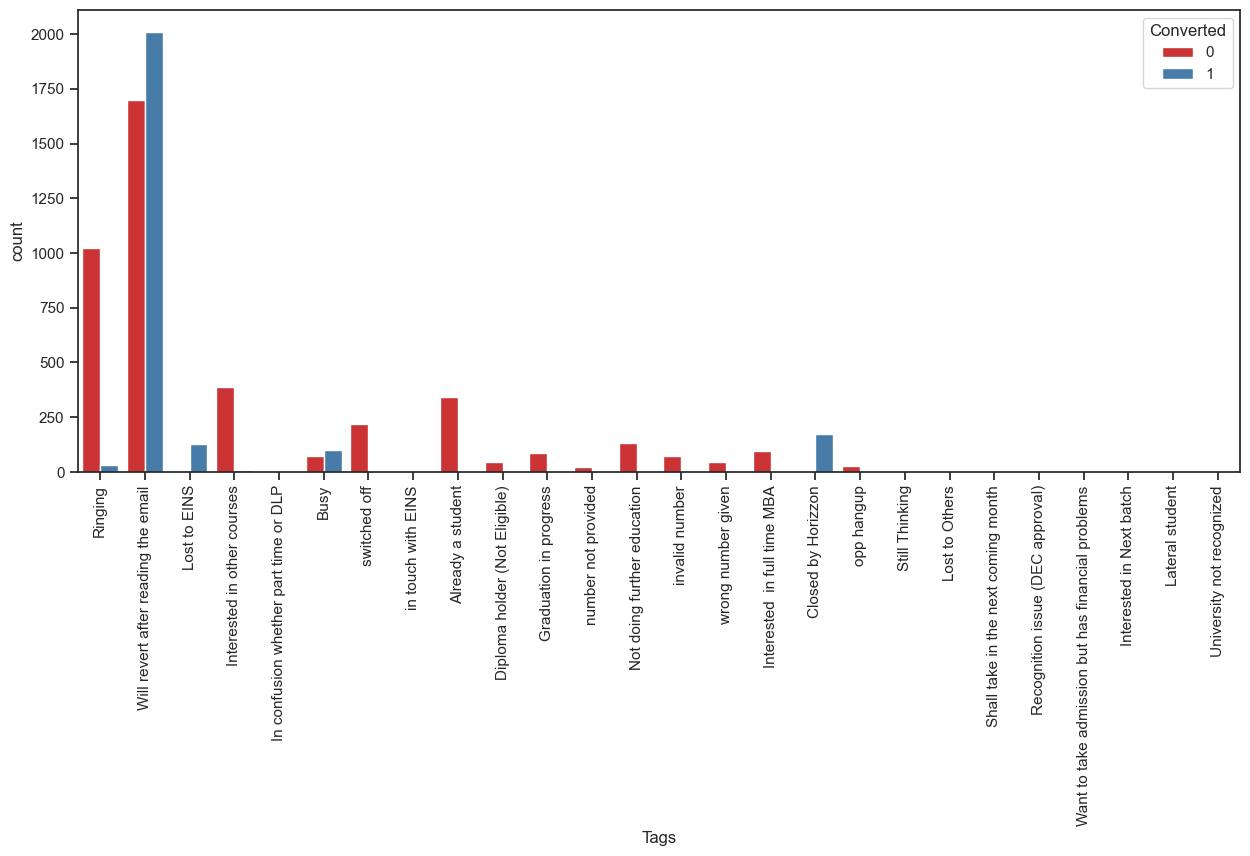

In [90]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Tags", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

#### Inference

##### Since this is a column which is generated by the sales team for their analysis , so this is not available for model building. 

##### So we will need to remove this column before building the model.

### 22) Update me on Supply Chain Content

(array([0]), [Text(0, 0, 'No')])

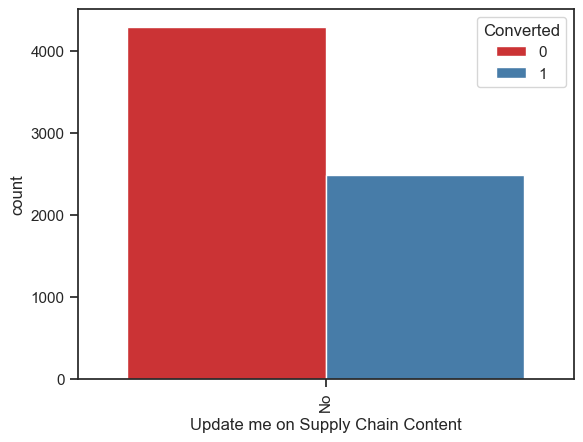

In [91]:
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

#### Inference

##### Most entries are 'No'. No Inference can be drawn with this parameter.

### 23) Get updates on DM Content

(array([0]), [Text(0, 0, 'No')])

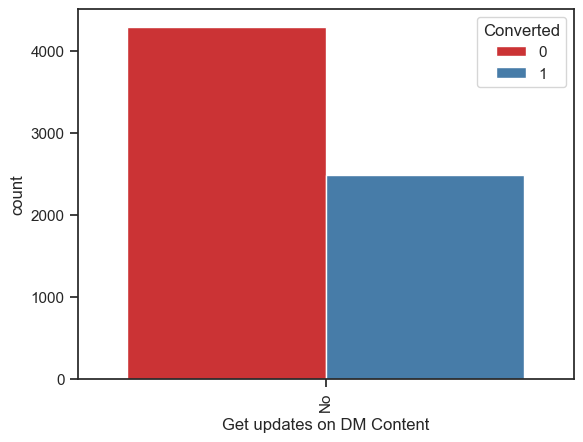

In [92]:
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

#### Inference

##### Most entries are 'No'. No Inference can be drawn with this parameter.

### 24) City

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

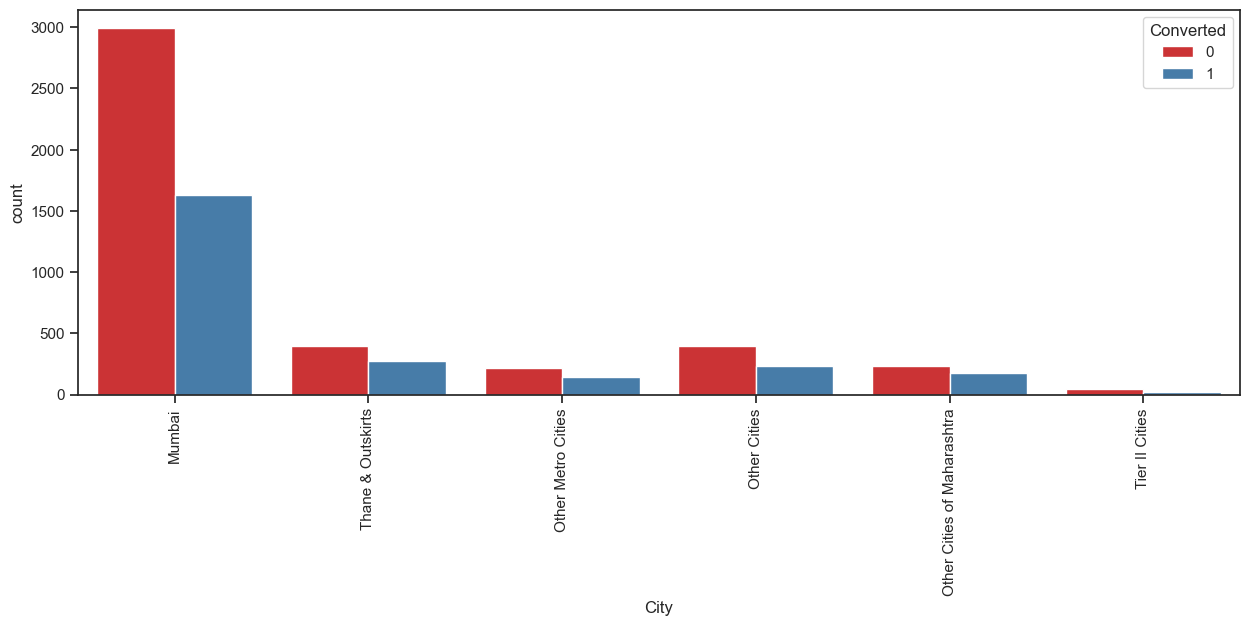

In [93]:
plt.figure(figsize=(15,5))
sns.countplot(x = "City", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

#### Inference

##### Most leads are from mumbai with around 50% conversion rate.

### 25) I agree to pay the amount through cheque

(array([0]), [Text(0, 0, 'No')])

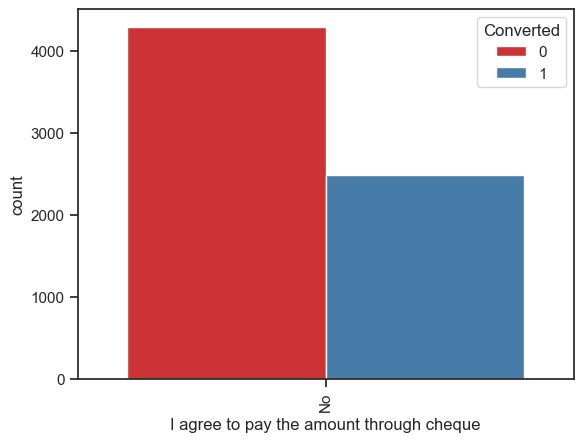

In [94]:
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

#### Inference

##### Most entries are 'No'. No Inference can be drawn with this parameter.

### 26) A free copy of Mastering The Interview

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

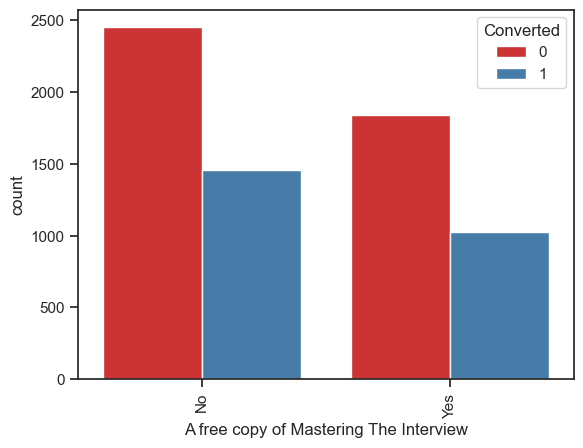

In [95]:
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

#### Inference

##### Most entries are 'No'. No Inference can be drawn with this parameter.

### 27) Last Notable Activity

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Email Opened'),
  Text(1, 0, 'Modified'),
  Text(2, 0, 'Page Visited on Website'),
  Text(3, 0, 'Email Bounced'),
  Text(4, 0, 'Email Link Clicked'),
  Text(5, 0, 'Unreachable'),
  Text(6, 0, 'Unsubscribed'),
  Text(7, 0, 'Had a Phone Conversation'),
  Text(8, 0, 'Olark Chat Conversation'),
  Text(9, 0, 'SMS Sent'),
  Text(10, 0, 'Approached upfront'),
  Text(11, 0, 'View in browser link Clicked'),
  Text(12, 0, 'Form Submitted on Website'),
  Text(13, 0, 'Email Received'),
  Text(14, 0, 'Email Marked Spam')])

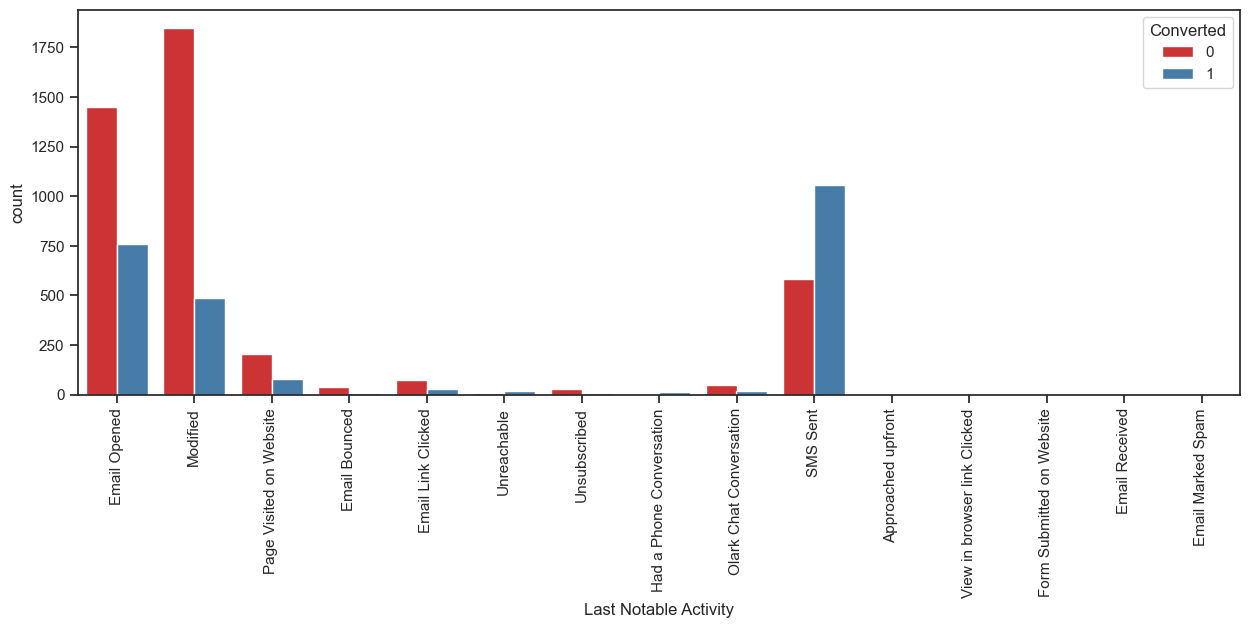

In [96]:
plt.figure(figsize=(15,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

#### Results

###### Based on the univariate analysis we have seen that many columns are not adding any information to the model, hence we can drop them for further analysis

In [97]:
lead_data = lead_data.drop(['Lead Number','Tags','Country','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview'],1)

In [98]:
lead_data.shape

(6778, 14)

In [99]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6778 entries, 1 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      6778 non-null   object 
 1   Lead Origin                      6778 non-null   object 
 2   Lead Source                      6778 non-null   object 
 3   Do Not Email                     6778 non-null   object 
 4   Do Not Call                      6778 non-null   object 
 5   Converted                        6778 non-null   int64  
 6   TotalVisits                      6778 non-null   float64
 7   Total Time Spent on Website      6778 non-null   int64  
 8   Page Views Per Visit             6778 non-null   float64
 9   Last Activity                    6778 non-null   object 
 10  Specialization                   6778 non-null   object 
 11  What is your current occupation  6778 non-null   object 
 12  City                

## Data Preparation

### 1) Converting some binary variables (Yes/No) to 1/0

In [100]:
vars =  ['Do Not Email', 'Do Not Call']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

lead_data[vars] = lead_data[vars].apply(binary_map)


### 2) Creating Dummy variables for the categorical features:

#### 'Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','City','Last Notable Activity'

In [101]:
# Creating a dummy variable for the categorical variables and dropping the first one.
dummy_data = pd.get_dummies(lead_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity']], drop_first=True)
dummy_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [102]:
# Concatenating the dummy_data to the lead_data dataframe
lead_data = pd.concat([lead_data, dummy_data], axis=1)
lead_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,0,1,0,0,0,0,0,0
6,9fae7df4-169d-489b-afe4-0f3d752542ed,Landing Page Submission,Google,0,0,1,2.0,1640,2.0,Email Opened,...,0,0,0,1,0,0,0,0,0,0


#### Dropping the columns for which dummies were created

In [103]:
lead_data = lead_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity'], axis = 1)

In [104]:
lead_data.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Facebook,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
6,9fae7df4-169d-489b-afe4-0f3d752542ed,0,0,1,2.0,1640,2.0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


### 3) Splitting the data into train and test set.

In [105]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = lead_data.drop(['Prospect ID','Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
6,0,0,2.0,1640,2.0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [106]:
# Putting target variable to y
y = lead_data['Converted']

y.head()

1    0
2    1
3    0
4    1
6    1
Name: Converted, dtype: int64

In [107]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)



### 4) Scaling the features

In [108]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2746,0,0,-0.485229,0.186744,-0.025207,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
6543,0,0,-0.876846,-0.854513,-0.659092,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7458,0,0,-0.485229,1.624932,-0.025207,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7448,0,0,0.298006,0.554137,1.242563,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6134,0,0,-0.485229,0.559676,-0.025207,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
# Checking the Lead Conversion rate
Converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
Converted

36.64797875479493

#### We have almost 37% lead conversion rate.

### Feature Selection Using RFE

In [110]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select = 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [111]:
rfe.support_

array([ True, False, False,  True, False,  True,  True, False, False,
        True, False, False,  True, False, False, False, False,  True,
       False, False,  True, False,  True, False,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
        True,  True,  True, False, False, False, False, False, False,
       False, False,  True, False, False,  True,  True, False, False,
       False,  True, False, False])

In [112]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 36),
 ('TotalVisits', False, 19),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 23),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Source_Facebook', False, 16),
 ('Lead Source_Google', False, 18),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 30),
 ('Lead Source_Others', False, 13),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 40),
 ('Lead Source_Welingak Website', False, 9),
 ('Last Activity_Email Bounced', False, 4),
 ('Last Activity_Email Link Clicked', False, 10),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 42),
 ('Last Activity_Olark Chat Conversation', False, 31),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 43),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', False, 

In [113]:
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Last Activity_Email Opened', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

## Model Building


#### Assessing the model with StatsModels

### Model-1

In [114]:
import statsmodels.api as sm

In [115]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4744
Model:                            GLM   Df Residuals:                     4723
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2020.2
Date:                Sat, 23 Dec 2023   Deviance:                       4040.3
Time:                        17:08:20   Pearson chi2:                 4.52e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3680
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.7961      0.688      2.609      0.009       0.447       3.145
Do Not Email                                            -1.5956      0.218     -7.319      0.000      -2.023      -1.168
Total Time Spent on Website                              1.1065      0.041     26.802      0.000       1.026       1.187
Lead Origin_Landing Page Submission                     -1.0508      0.154     -6.831      0.000      -1.352      -0.749
Lead Origin_Lead Add Form                               23.2379   4.48e+04      0.001      1.000   -8.77e+04    8.77e+04
Lead Source_Olark Chat                                  -0.7195      0.336     -2.144      0.032      -1.377      -0.062
Lead Source_Reference                                   -0.0124   4.76e+04  -2.61e-07      1.000   -9.33e+04    9.33e+04
Last Activity_Email Opened                               0.8912      0.178      5.011      0.000       0.543       1.240
Last Activity_Other_Activity                             1.5260      0.647      2.359      0.018       0.258       2.794
Last Activity_SMS Sent                                   1.1644      0.122      9.520      0.000       0.925       1.404
Last Activity_Unsubscribed                               1.1326      0.497      2.278      0.023       0.158       2.107
Specialization_Hospitality Management                   -0.7544      0.352     -2.143      0.032      -1.444      -0.065
Specialization_Others                                   -1.2576      0.166     -7.571      0.000      -1.583      -0.932
What is your current occupation_Housewife               22.6719   2.53e+04      0.001      0.999   -4.96e+04    4.97e+04
What is your current occupation_Student                 -1.1699      0.727     -1.610      0.107      -2.594       0.255
What is your current occupation_Unemployed              -1.6130      0.668     -2.415      0.016      -2.922      -0.304
What is your current occupation_Working Professional     1.2202      0.698      1.748      0.081      -0.148       2.589
Last Notable Activity_Email Opened                      -1.0179      0.201     -5.053      0.000      -1.413      -0.623
Last Notable Activity_Had a Phone Conversation           1.6181      1.281      1.263      0.206      -0.892       4.128
Last Notable Activity_Modified                          -1.1594      0.122     -9.478      0.000      -1.399      -0.920
Last Notable Activity_Unreachable                        2.1512      0.854      2.518      0.012       0.477       3.826
========================================================================================================================
"""

#### Since Pvalue of 'What is your current occupation_Housewife' is very high, we can drop this column.

In [116]:
# Dropping the column 'What is your current occupation_Housewife'
col1 = cols.drop('What is your current occupation_Housewife')




## Model-2

In [117]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4744
Model:                            GLM   Df Residuals:                     4724
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2022.2
Date:                Sat, 23 Dec 2023   Deviance:                       4044.5
Time:                        17:08:46   Pearson chi2:                 4.53e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3674
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.4142      0.624      3.871      0.000       1.192       3.637
Do Not Email                                            -1.6015      0.218     -7.332      0.000      -2.030      -1.173
Total Time Spent on Website                              1.1055      0.041     26.791      0.000       1.025       1.186
Lead Origin_Landing Page Submission                     -1.0478      0.154     -6.811      0.000      -1.349      -0.746
Lead Origin_Lead Add Form                               23.2356   4.48e+04      0.001      1.000   -8.77e+04    8.77e+04
Lead Source_Olark Chat                                  -0.7169      0.335     -2.137      0.033      -1.374      -0.059
Lead Source_Reference                                    0.0277   4.77e+04    5.8e-07      1.000   -9.34e+04    9.34e+04
Last Activity_Email Opened                               0.8983      0.177      5.062      0.000       0.550       1.246
Last Activity_Other_Activity                             1.5288      0.647      2.363      0.018       0.261       2.797
Last Activity_SMS Sent                                   1.1653      0.122      9.527      0.000       0.926       1.405
Last Activity_Unsubscribed                               1.1390      0.497      2.290      0.022       0.164       2.114
Specialization_Hospitality Management                   -0.7541      0.352     -2.143      0.032      -1.444      -0.064
Specialization_Others                                   -1.2572      0.166     -7.570      0.000      -1.583      -0.932
What is your current occupation_Student                 -1.7909      0.663     -2.701      0.007      -3.091      -0.491
What is your current occupation_Unemployed              -2.2338      0.598     -3.733      0.000      -3.407      -1.061
What is your current occupation_Working Professional     0.5990      0.632      0.948      0.343      -0.639       1.837
Last Notable Activity_Email Opened                      -1.0239      0.201     -5.092      0.000      -1.418      -0.630
Last Notable Activity_Had a Phone Conversation           1.6148      1.281      1.261      0.207      -0.895       4.125
Last Notable Activity_Modified                          -1.1613      0.122     -9.492      0.000      -1.401      -0.921
Last Notable Activity_Unreachable                        2.1491      0.855      2.513      0.012       0.473       3.825
========================================================================================================================
"""

###### Since Pvalue of 'Last Notable Activity_Had a Phone Conversation' is very high, we can drop this column.

In [118]:
col1 = col1.drop('Last Notable Activity_Had a Phone Conversation')



## Model-3

In [119]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4744
Model:                            GLM   Df Residuals:                     4725
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2023.2
Date:                Sat, 23 Dec 2023   Deviance:                       4046.3
Time:                        17:09:07   Pearson chi2:                 4.53e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3672
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.4321      0.624      3.898      0.000       1.209       3.655
Do Not Email                                            -1.6063      0.219     -7.343      0.000      -2.035      -1.178
Total Time Spent on Website                              1.1045      0.041     26.768      0.000       1.024       1.185
Lead Origin_Landing Page Submission                     -1.0522      0.154     -6.844      0.000      -1.354      -0.751
Lead Origin_Lead Add Form                               23.2303   4.48e+04      0.001      1.000   -8.77e+04    8.77e+04
Lead Source_Olark Chat                                  -0.7219      0.335     -2.152      0.031      -1.379      -0.064
Lead Source_Reference                                    0.0292   4.77e+04   6.13e-07      1.000   -9.34e+04    9.34e+04
Last Activity_Email Opened                               0.9034      0.177      5.091      0.000       0.556       1.251
Last Activity_Other_Activity                             2.0410      0.522      3.910      0.000       1.018       3.064
Last Activity_SMS Sent                                   1.1585      0.122      9.480      0.000       0.919       1.398
Last Activity_Unsubscribed                               1.1356      0.497      2.283      0.022       0.161       2.111
Specialization_Hospitality Management                   -0.7539      0.352     -2.142      0.032      -1.444      -0.064
Specialization_Others                                   -1.2660      0.166     -7.628      0.000      -1.591      -0.941
What is your current occupation_Student                 -1.7938      0.663     -2.704      0.007      -3.094      -0.493
What is your current occupation_Unemployed              -2.2363      0.599     -3.735      0.000      -3.410      -1.063
What is your current occupation_Working Professional     0.5892      0.632      0.932      0.351      -0.649       1.828
Last Notable Activity_Email Opened                      -1.0390      0.201     -5.174      0.000      -1.433      -0.645
Last Notable Activity_Modified                          -1.1762      0.122     -9.648      0.000      -1.415      -0.937
Last Notable Activity_Unreachable                        2.1397      0.855      2.502      0.012       0.463       3.816
========================================================================================================================
"""

#### Since Pvalue of 'What is your current occupation_Student' is very high, we can drop this column.

In [120]:
col1 = col1.drop('What is your current occupation_Student')




## Model-4

In [121]:


X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4744
Model:                            GLM   Df Residuals:                     4726
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2027.2
Date:                Sat, 23 Dec 2023   Deviance:                       4054.3
Time:                        17:09:29   Pearson chi2:                 4.54e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3661
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.0213      0.309      3.306      0.001       0.416       1.627
Do Not Email                                            -1.5915      0.218     -7.309      0.000      -2.018      -1.165
Total Time Spent on Website                              1.1057      0.041     26.817      0.000       1.025       1.186
Lead Origin_Landing Page Submission                     -1.0637      0.153     -6.934      0.000      -1.364      -0.763
Lead Origin_Lead Add Form                               23.2177   4.48e+04      0.001      1.000   -8.77e+04    8.77e+04
Lead Source_Olark Chat                                  -0.7499      0.336     -2.234      0.025      -1.408      -0.092
Lead Source_Reference                                    0.0719   4.76e+04   1.51e-06      1.000   -9.33e+04    9.33e+04
Last Activity_Email Opened                               0.8955      0.177      5.059      0.000       0.549       1.242
Last Activity_Other_Activity                             2.0391      0.522      3.907      0.000       1.016       3.062
Last Activity_SMS Sent                                   1.1574      0.122      9.476      0.000       0.918       1.397
Last Activity_Unsubscribed                               1.1258      0.497      2.264      0.024       0.151       2.100
Specialization_Hospitality Management                   -0.7645      0.351     -2.176      0.030      -1.453      -0.076
Specialization_Others                                   -1.2832      0.166     -7.745      0.000      -1.608      -0.959
What is your current occupation_Unemployed              -0.8184      0.254     -3.220      0.001      -1.317      -0.320
What is your current occupation_Working Professional     2.0059      0.326      6.152      0.000       1.367       2.645
Last Notable Activity_Email Opened                      -1.0250      0.200     -5.114      0.000      -1.418      -0.632
Last Notable Activity_Modified                          -1.1632      0.122     -9.558      0.000      -1.402      -0.925
Last Notable Activity_Unreachable                        2.1574      0.853      2.528      0.011       0.485       3.830
========================================================================================================================
"""



#### Since Pvalue of 'Lead Origin_Lead Add Form' is very high, we can drop this column.

In [122]:
col1 = col1.drop('Lead Origin_Lead Add Form')




## Model-5



In [123]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4744
Model:                            GLM   Df Residuals:                     4727
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2028.7
Date:                Sat, 23 Dec 2023   Deviance:                       4057.5
Time:                        17:09:46   Pearson chi2:                 4.54e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3657
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.0440      0.309      3.381      0.001       0.439       1.649
Do Not Email                                            -1.5907      0.218     -7.302      0.000      -2.018      -1.164
Total Time Spent on Website                              1.1059      0.041     26.820      0.000       1.025       1.187
Lead Origin_Landing Page Submission                     -1.0887      0.153     -7.127      0.000      -1.388      -0.789
Lead Source_Olark Chat                                  -0.7739      0.335     -2.308      0.021      -1.431      -0.117
Lead Source_Reference                                   23.2656   1.62e+04      0.001      0.999   -3.18e+04    3.18e+04
Last Activity_Email Opened                               0.9212      0.176      5.239      0.000       0.577       1.266
Last Activity_Other_Activity                             2.0399      0.522      3.906      0.000       1.016       3.063
Last Activity_SMS Sent                                   1.1586      0.122      9.482      0.000       0.919       1.398
Last Activity_Unsubscribed                               1.1268      0.497      2.266      0.023       0.152       2.101
Specialization_Hospitality Management                   -0.7682      0.352     -2.185      0.029      -1.457      -0.079
Specialization_Others                                   -1.3075      0.165     -7.918      0.000      -1.631      -0.984
What is your current occupation_Unemployed              -0.8180      0.254     -3.217      0.001      -1.316      -0.320
What is your current occupation_Working Professional     2.0054      0.326      6.147      0.000       1.366       2.645
Last Notable Activity_Email Opened                      -1.0503      0.199     -5.267      0.000      -1.441      -0.660
Last Notable Activity_Modified                          -1.1641      0.122     -9.561      0.000      -1.403      -0.925
Last Notable Activity_Unreachable                        2.1565      0.854      2.527      0.012       0.484       3.829
========================================================================================================================
"""

#
## Checking for VIF values:
#

In [124]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,13.13
13,Last Notable Activity_Email Opened,8.57
2,Lead Origin_Landing Page Submission,7.89
5,Last Activity_Email Opened,7.64
14,Last Notable Activity_Modified,3.01
10,Specialization_Others,2.91
7,Last Activity_SMS Sent,2.77
12,What is your current occupation_Working Profes...,1.88
0,Do Not Email,1.32
3,Lead Source_Olark Chat,1.15


In [125]:
# Dropping the column  'What is your current occupation_Unemployed' because it has high VIF
col1 = col1.drop('What is your current occupation_Unemployed')

#
#
## Model -6
#
#

In [126]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4744
Model:                            GLM   Df Residuals:                     4728
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2033.8
Date:                Sat, 23 Dec 2023   Deviance:                       4067.6
Time:                        17:10:07   Pearson chi2:                 4.54e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3643
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2441      0.182      1.343      0.179      -0.112       0.600
Do Not Email                                            -1.5988      0.218     -7.347      0.000      -2.025      -1.172
Total Time Spent on Website                              1.1067      0.041     26.867      0.000       1.026       1.187
Lead Origin_Landing Page Submission                     -1.0772      0.153     -7.059      0.000      -1.376      -0.778
Lead Source_Olark Chat                                  -0.7530      0.334     -2.254      0.024      -1.408      -0.098
Lead Source_Reference                                   23.3278   1.61e+04      0.001      0.999   -3.15e+04    3.16e+04
Last Activity_Email Opened                               0.9080      0.176      5.162      0.000       0.563       1.253
Last Activity_Other_Activity                             2.0134      0.522      3.858      0.000       0.991       3.036
Last Activity_SMS Sent                                   1.1396      0.122      9.361      0.000       0.901       1.378
Last Activity_Unsubscribed                               1.1051      0.497      2.223      0.026       0.131       2.079
Specialization_Hospitality Management                   -0.7686      0.352     -2.182      0.029      -1.459      -0.078
Specialization_Others                                   -1.3002      0.165     -7.872      0.000      -1.624      -0.977
What is your current occupation_Working Professional     2.8009      0.214     13.102      0.000       2.382       3.220
Last Notable Activity_Email Opened                      -1.0392      0.199     -5.213      0.000      -1.430      -0.649
Last Notable Activity_Modified                          -1.1617      0.121     -9.562      0.000      -1.400      -0.924
Last Notable Activity_Unreachable                        2.1483      0.850      2.527      0.011       0.482       3.815
========================================================================================================================
"""

In [132]:
# Dropping the column  'Lead Origin_Lead Import' because it has high Pvalue
col1 = col1.drop('Lead Origin_Lead Import')

#
## Model - 7
#

In [127]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4744
Model:                            GLM   Df Residuals:                     4728
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2033.8
Date:                Sat, 23 Dec 2023   Deviance:                       4067.6
Time:                        17:10:14   Pearson chi2:                 4.54e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3643
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2441      0.182      1.343      0.179      -0.112       0.600
Do Not Email                                            -1.5988      0.218     -7.347      0.000      -2.025      -1.172
Total Time Spent on Website                              1.1067      0.041     26.867      0.000       1.026       1.187
Lead Origin_Landing Page Submission                     -1.0772      0.153     -7.059      0.000      -1.376      -0.778
Lead Source_Olark Chat                                  -0.7530      0.334     -2.254      0.024      -1.408      -0.098
Lead Source_Reference                                   23.3278   1.61e+04      0.001      0.999   -3.15e+04    3.16e+04
Last Activity_Email Opened                               0.9080      0.176      5.162      0.000       0.563       1.253
Last Activity_Other_Activity                             2.0134      0.522      3.858      0.000       0.991       3.036
Last Activity_SMS Sent                                   1.1396      0.122      9.361      0.000       0.901       1.378
Last Activity_Unsubscribed                               1.1051      0.497      2.223      0.026       0.131       2.079
Specialization_Hospitality Management                   -0.7686      0.352     -2.182      0.029      -1.459      -0.078
Specialization_Others                                   -1.3002      0.165     -7.872      0.000      -1.624      -0.977
What is your current occupation_Working Professional     2.8009      0.214     13.102      0.000       2.382       3.220
Last Notable Activity_Email Opened                      -1.0392      0.199     -5.213      0.000      -1.430      -0.649
Last Notable Activity_Modified                          -1.1617      0.121     -9.562      0.000      -1.400      -0.924
Last Notable Activity_Unreachable                        2.1483      0.850      2.527      0.011       0.482       3.815
========================================================================================================================
"""

#
## Checking VIF Values
#

In [128]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Last Notable Activity_Email Opened,8.13
5,Last Activity_Email Opened,7.55
2,Lead Origin_Landing Page Submission,4.59
13,Last Notable Activity_Modified,2.50
7,Last Activity_SMS Sent,2.21
10,Specialization_Others,1.92
0,Do Not Email,1.31
11,What is your current occupation_Working Profes...,1.12
8,Last Activity_Unsubscribed,1.11
1,Total Time Spent on Website,1.07


In [129]:
# Dropping the column  'Last Activity_Unsubscribed' to reduce the variables
col1 = col1.drop('Last Activity_Unsubscribed')

#
## Model - 8
#

In [130]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4744
Model:                            GLM   Df Residuals:                     4729
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2036.0
Date:                Sat, 23 Dec 2023   Deviance:                       4072.0
Time:                        17:10:27   Pearson chi2:                 4.54e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3637
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2738      0.181      1.513      0.130      -0.081       0.628
Do Not Email                                            -1.4475      0.200     -7.252      0.000      -1.839      -1.056
Total Time Spent on Website                              1.1075      0.041     26.895      0.000       1.027       1.188
Lead Origin_Landing Page Submission                     -1.0737      0.152     -7.044      0.000      -1.372      -0.775
Lead Source_Olark Chat                                  -0.7465      0.335     -2.232      0.026      -1.402      -0.091
Lead Source_Reference                                   23.3268   1.61e+04      0.001      0.999   -3.15e+04    3.15e+04
Last Activity_Email Opened                               0.9011      0.176      5.128      0.000       0.557       1.245
Last Activity_Other_Activity                             1.9889      0.522      3.809      0.000       0.965       3.012
Last Activity_SMS Sent                                   1.1034      0.120      9.184      0.000       0.868       1.339
Specialization_Hospitality Management                   -0.7731      0.352     -2.199      0.028      -1.462      -0.084
Specialization_Others                                   -1.2967      0.165     -7.862      0.000      -1.620      -0.973
What is your current occupation_Working Professional     2.7945      0.213     13.106      0.000       2.377       3.212
Last Notable Activity_Email Opened                      -1.0654      0.199     -5.357      0.000      -1.455      -0.676
Last Notable Activity_Modified                          -1.1878      0.121     -9.839      0.000      -1.424      -0.951
Last Notable Activity_Unreachable                        2.1156      0.850      2.489      0.013       0.450       3.781
========================================================================================================================
"""

In [131]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Last Notable Activity_Email Opened,8.10
5,Last Activity_Email Opened,7.55
2,Lead Origin_Landing Page Submission,4.54
12,Last Notable Activity_Modified,2.47
7,Last Activity_SMS Sent,2.19
9,Specialization_Others,1.91
0,Do Not Email,1.22
10,What is your current occupation_Working Profes...,1.12
1,Total Time Spent on Website,1.07
3,Lead Source_Olark Chat,1.07


In [132]:
# Dropping the column  'Last Notable Activity_Unreachable' to reduce the variables
col1 = col1.drop('Last Notable Activity_Unreachable')

#
## Model-9
#

In [133]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4744
Model:                            GLM   Df Residuals:                     4730
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2039.9
Date:                Sat, 23 Dec 2023   Deviance:                       4079.9
Time:                        17:10:42   Pearson chi2:                 4.54e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3627
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3316      0.179      1.849      0.064      -0.020       0.683
Do Not Email                                            -1.4671      0.199     -7.354      0.000      -1.858      -1.076
Total Time Spent on Website                              1.1077      0.041     26.927      0.000       1.027       1.188
Lead Origin_Landing Page Submission                     -1.0810      0.152     -7.105      0.000      -1.379      -0.783
Lead Source_Olark Chat                                  -0.7580      0.334     -2.269      0.023      -1.413      -0.103
Lead Source_Reference                                   23.3091   1.61e+04      0.001      0.999   -3.14e+04    3.15e+04
Last Activity_Email Opened                               0.8842      0.175      5.041      0.000       0.540       1.228
Last Activity_Other_Activity                             1.9565      0.523      3.742      0.000       0.932       2.981
Last Activity_SMS Sent                                   1.0599      0.119      8.921      0.000       0.827       1.293
Specialization_Hospitality Management                   -0.7775      0.352     -2.211      0.027      -1.467      -0.088
Specialization_Others                                   -1.2979      0.165     -7.884      0.000      -1.621      -0.975
What is your current occupation_Working Professional     2.7916      0.213     13.100      0.000       2.374       3.209
Last Notable Activity_Email Opened                      -1.1002      0.198     -5.545      0.000      -1.489      -0.711
Last Notable Activity_Modified                          -1.2231      0.120    -10.193      0.000      -1.458      -0.988
========================================================================================================================
"""

#
## Checking for VIF values:
#

In [134]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Last Notable Activity_Email Opened,8.09
5,Last Activity_Email Opened,7.55
2,Lead Origin_Landing Page Submission,4.50
12,Last Notable Activity_Modified,2.46
7,Last Activity_SMS Sent,2.17
9,Specialization_Others,1.89
0,Do Not Email,1.22
10,What is your current occupation_Working Profes...,1.12
1,Total Time Spent on Website,1.07
3,Lead Source_Olark Chat,1.06


#### Since the Pvalues of all variables is 0 and VIF values are low for all the variables, model-9 is our final model. We have 12 variables in our final model.

#
### Making Prediction on the Train set
#

In [135]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2746    0.292880
6543    0.128764
7458    0.891908
7448    0.976244
6134    0.414488
418     0.101372
6439    0.116854
2837    0.910614
5336    0.061765
8261    0.941894
dtype: float64

In [136]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.29287985, 0.12876416, 0.89190824, 0.97624362, 0.41448814,
       0.10137191, 0.1168544 , 0.91061401, 0.06176526, 0.94189401])

#
#### Creating a dataframe with the actual Converted flag and the predicted probabilities
#


In [137]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.292880,2746
1,0,0.128764,6543
2,1,0.891908,7458
3,1,0.976244,7448
4,1,0.414488,6134


#### Choosing an arbitrary cut-off probability point of 0.5 to find the predicted labels

###### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [138]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,1,0.292880,2746,0
1,0,0.128764,6543,0
2,1,0.891908,7458,1
3,1,0.976244,7448,1
4,1,0.414488,6134,0


#
### Making the Confusion matrix
#

In [139]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[2665  356]
 [ 592 1131]]


In [140]:
# The confusion matrix indicates as below
# Predicted     not_converted    converted
# Actual
# not_converted        3461      444
# converted            719       1727  


In [141]:
# Let's check the overall accuracy.
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.8001686340640809


#
### Metrics beyond simply accuracy
#

In [142]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [143]:
# Sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.6564132327336042


In [144]:
# Let us calculate specificity
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.8821582257530619


In [145]:
# Calculate false postive rate - predicting converted lead when the lead actually was not converted
print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.1178417742469381


In [146]:
# positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7605917955615333


In [147]:
# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.8182376420018422


#### We found out that our specificity was good (~88%) but our sensitivity was only 70%. Hence, this needed to be taken care of.

#### We have got sensitivity of 70% and this was mainly because of the cut-off point of 0.5 that we had arbitrarily chosen. Now, this cut-off point had to be optimised in order to get a decent value of sensitivity and for this we will use the ROC curve.

### Plotting the ROC Curve

#### An ROC curve demonstrates several things:

##### It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
##### The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
##### The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [148]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [149]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

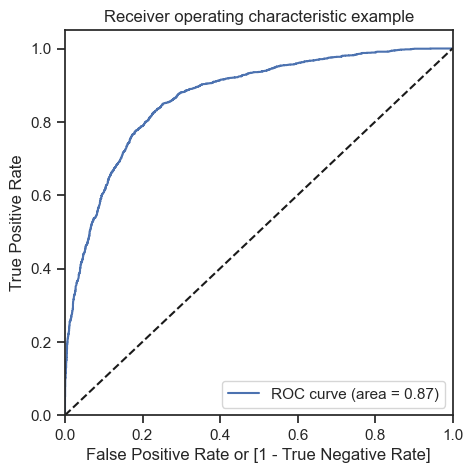

In [150]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

#### Since we have higher (0.89) area under the ROC curve , therefore our model is a good one.

### Finding Optimal Cutoff Point

#### Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that. Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [151]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.292880,2746,0,1,1,1,0,0,0,0,0,0,0
1,0,0.128764,6543,0,1,1,0,0,0,0,0,0,0,0
2,1,0.891908,7458,1,1,1,1,1,1,1,1,1,1,0
3,1,0.976244,7448,1,1,1,1,1,1,1,1,1,1,1
4,1,0.414488,6134,0,1,1,1,1,1,0,0,0,0,0


In [152]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.363196  1.000000  0.000000
0.1   0.1  0.562816  0.972722  0.329030
0.2   0.2  0.746838  0.893210  0.663357
0.3   0.3  0.785202  0.838073  0.755048
0.4   0.4  0.803331  0.755659  0.830520
0.5   0.5  0.800169  0.656413  0.882158
0.6   0.6  0.785835  0.558328  0.915591
0.7   0.7  0.770025  0.463726  0.944720
0.8   0.8  0.742411  0.336622  0.973850
0.9   0.9  0.702993  0.192107  0.994373


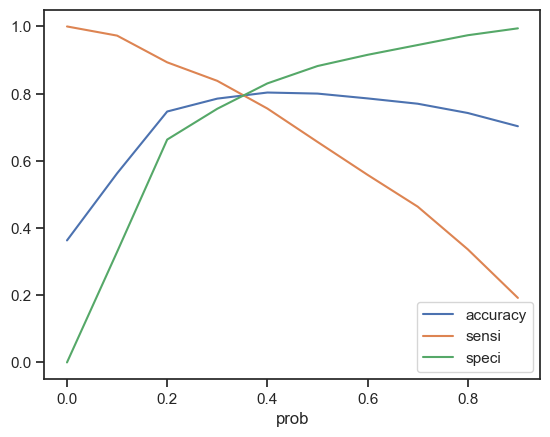

In [153]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#
#### From the curve above, 0.34 is the optimum point to take it as a cutoff probability.
#

In [154]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.292880,2746,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.128764,6543,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.891908,7458,1,1,1,1,1,1,1,1,1,1,0,1
3,1,0.976244,7448,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.414488,6134,0,1,1,1,1,1,0,0,0,0,0,1


#
#### Assigning Lead Score to the Training data
# 

In [155]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

#y_train_pred_final.head()

#
### Model Evaluation
#

In [156]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.7927908937605397


In [157]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2377,  644],
       [ 339, 1384]], dtype=int64)

In [158]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [159]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.8032501450957632


In [160]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.7868255544521682


In [161]:
# Calculate false postive rate - predicting converted lead when the lead was actually not have converted
print("False Positive rate : ",FP/ float(TN+FP))

False Positive rate :  0.21317444554783185


In [162]:
# Positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.6824457593688363


In [163]:
# Negative predictive value
print("Negative Predictive Value : ",TN / float(TN+ FN))

Negative Predictive Value :  0.8751840942562592


## Precision and Recall

##### Precision = Also known as Positive Predictive Value, it refers to the percentage of the results which are relevant.

##### Recall = Also known as Sensitivity , it refers to the percentage of total relevant results correctly classified by the algorithm.

In [164]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[2665,  356],
       [ 592, 1131]], dtype=int64)

In [165]:
# Precision
TP / TP + FP

print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.7605917955615333


In [166]:
# Recall
TP / TP + FN

print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.6564132327336042


Using sklearn utilities for the same

In [167]:
from sklearn.metrics import precision_score, recall_score

In [168]:
print("Precision :",precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted))

Precision : 0.7605917955615333


In [169]:
print("Recall :",recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Recall : 0.6564132327336042


### Precision and recall tradeoff

In [170]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.predicted

(0       1
 1       0
 2       1
 3       1
 4       1
        ..
 4739    0
 4740    1
 4741    0
 4742    0
 4743    0
 Name: Converted, Length: 4744, dtype: int64,
 0       0
 1       0
 2       1
 3       1
 4       0
        ..
 4739    0
 4740    1
 4741    0
 4742    1
 4743    1
 Name: predicted, Length: 4744, dtype: int64)

In [171]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

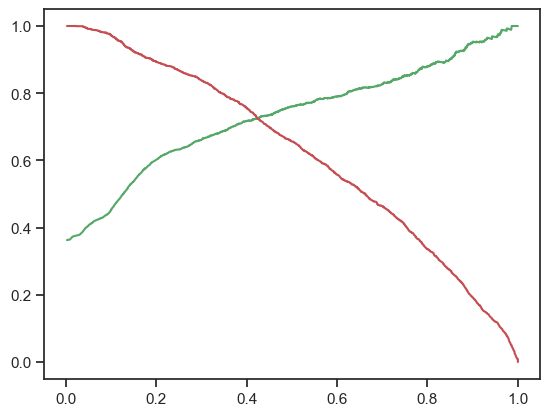

In [172]:
# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

#### Scaling the test data

In [173]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [174]:
# Assigning the columns selected by the final model to the X_test 
X_test = X_test[col1]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Last Activity_Email Opened,Last Activity_Other_Activity,Last Activity_SMS Sent,Specialization_Hospitality Management,Specialization_Others,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified
141,0,-0.769587,0,0,0,0,0,0,0,1,0,0,0
7418,0,-0.904360,1,0,0,1,0,0,0,0,0,1,0
6408,0,1.056303,1,0,0,0,0,0,0,0,0,0,0
3128,0,-1.100057,0,0,0,0,0,0,0,1,0,0,1
1490,0,1.624932,1,0,0,1,0,0,0,0,1,1,0


In [175]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

141     0.139578
7418    0.122696
6408    0.603641
3128    0.032048
1490    0.974071
6105    0.010319
2470    0.042147
4488    0.950556
6091    0.596959
3226    0.131776
dtype: float64

In [176]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [177]:
# Let's see the head
y_pred_1.head()

,0
141,0.139578
7418,0.122696
6408,0.603641
3128,0.032048
1490,0.974071


In [178]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [179]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [180]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [181]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [182]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,141,0.139578
1,0,7418,0.122696
2,1,6408,0.603641
3,0,3128,0.032048
4,1,1490,0.974071


In [183]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [184]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

In [185]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,141,0,0.139578
1,7418,0,0.122696
2,6408,1,0.603641
3,3128,0,0.032048
4,1490,1,0.974071


In [186]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)

In [187]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,141,0,0.139578,0
1,7418,0,0.122696,0
2,6408,1,0.603641,1
3,3128,0,0.032048,0
4,1490,1,0.974071,1


In [188]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.8107177974434612


In [189]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1025,  248],
       [ 137,  624]], dtype=int64)

In [190]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [193]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.8199737187910644


In [191]:
# Let us calculate specificity

print("Specificity :",TN / float(TN+FP))

Specificity : 0.805184603299293


#
### Assigning Lead Score to the Testing data
#

In [192]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,141,0,0.139578,0,14
1,7418,0,0.122696,0,12
2,6408,1,0.603641,1,60
3,3128,0,0.032048,0,3
4,1490,1,0.974071,1,97


### Observations:
After running the model on the Test Data , we obtain:

#### Accuracy : 80.4 %
#### Sensitivity : 80.4 %
#### Specificity : 80.5 %

### Results :

#### 1) Comparing the values obtained for Train & Test:

##### Train Data:
Accuracy : 81.0 %
Sensitivity : 81.7 %
Specificity : 80.6 %
##### Test Data:
Accuracy : 80.4 %
Sensitivity : 80.4 %
Specificity : 80.5 %
## 
Thus we have achieved our goal of getting a ballpark of the target lead conversion rate to be around 80% . The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model to get a higher lead conversion rate of 80%.

#### 2) Finding out the leads which should be contacted:
The customers which should be contacted are the customers whose "Lead Score" is equal to or greater than 85. They can be termed as 'Hot Leads'

In [194]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
4,1490,1,0.974071,1,97
7,4488,1,0.950556,1,95
35,7696,1,0.929879,1,93
48,2913,1,1.000000,1,100
56,9232,0,0.933140,1,93
...,...,...,...,...,...
1994,8867,1,0.957916,1,96
2000,7552,1,0.973909,1,97
2023,8220,1,0.864684,1,86
2030,5868,1,0.896550,1,90


#### So there are 368 leads which can be contacted and have a high chance of getting converted. The Prospect ID of the customers to be contacted are :

In [195]:
print("The Prospect ID of the customers which should be contacted are :")

hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers which should be contacted are :


array([1490, 4488, 7696, 2913, 9232, 3015,  785, 4457, 1470, 3290, 3150,
       5061, 8161,   76, 8980, 6046, 3814, 7121, 4743, 3097, 3165, 5423,
       8801, 2427, 1950, 2016, 1710, 1899,  964, 8990, 4955, 9211, 1747,
       9100, 6811, 2043, 1619, 4498, 5000, 7750, 1254, 2835, 2473, 5206,
       5752, 5448, 1770, 4795, 5747, 3123, 7672, 8282, 1595, 4238, 9062,
       2240, 8268, 4005, 7853, 7320, 7941, 1820, 4285, 6008, 1283, 2614,
        161, 6913, 5525, 8393, 6501, 3944, 8790, 6994, 5337, 2946,  693,
       7096, 6193, 4187, 3532, 7652, 4540, 6728, 2337, 5270, 4942, 7136,
       8286, 3725, 1739, 7814, 6995, 6987,  745, 4860, 5019, 1552, 6685,
       1693, 5783,  533, 3060, 3488, 3496, 4607, 3242, 5825, 4577, 5137,
       1612, 7470, 3926, 5757, 2101, 2709,  829, 3921, 7297, 1007, 9108,
       6860, 1079, 4253, 5896, 4971, 5470, 1856, 7893, 2314, 7963, 2519,
       4940, 5994, 9221, 2961, 7766,  459, 5474, 6947,  943,  494, 1588,
       2489, 1774, 4634, 7453, 7653, 3836,  551, 25

##
### 3) Finding out the Important Features from our final model:
##


In [196]:
res.params.sort_values(ascending=False)

Lead Source_Reference                                   23.309134
What is your current occupation_Working Professional     2.791592
Last Activity_Other_Activity                             1.956511
Total Time Spent on Website                              1.107694
Last Activity_SMS Sent                                   1.059854
Last Activity_Email Opened                               0.884195
const                                                    0.331610
Lead Source_Olark Chat                                  -0.757981
Specialization_Hospitality Management                   -0.777515
Lead Origin_Landing Page Submission                     -1.081010
Last Notable Activity_Email Opened                      -1.100187
Last Notable Activity_Modified                          -1.223088
Specialization_Others                                   -1.297942
Do Not Email                                            -1.467083
dtype: float64

#### Recommendations:
The company should make calls to the leads coming from the lead sources "Welingak Websites" and "Reference" as these are more likely to get converted.

The company should make calls to the leads who spent "more time on the websites" as these are more likely to get converted.

The company should make calls to the leads coming from the lead sources "Olark Chat" as these are more likely to get converted.

The company should make calls to the leads whose last activity was SMS Sent as they are more likely to get converted.

The company should not make calls to the leads whose last activity was "Olark Chat Conversation" as they are not likely to get converted.

The company should not make calls to the leads whose lead origin is "Landing Page Submission" as they are not likely to get converted.

The company should not make calls to the leads whose Specialization was "Others" as they are not likely to get converted.

The company should not make calls to the leads who chose the option of "Do not Email" as "yes" as they are not likely to get converted.